In [1]:
from bluepy.v2 import Simulation

import efel

from bluepy.v2 import Circuit
from bluepy.v2 import Cell
from bluepy.v2.enums import Synapse

In [2]:
from os import path

import pandas as pd

import numpy as np
from matplotlib import pyplot as plt
import pickle


from json2html import *


In [3]:
efel.getFeatureNames()

['AHP1_depth_from_peak',
 'AHP2_depth_from_peak',
 'AHP_depth',
 'AHP_depth_abs',
 'AHP_depth_abs_slow',
 'AHP_depth_diff',
 'AHP_depth_from_peak',
 'AHP_slow_time',
 'AHP_time_from_peak',
 'AP1_amp',
 'AP1_begin_voltage',
 'AP1_begin_width',
 'AP1_peak',
 'AP1_width',
 'AP2_AP1_begin_width_diff',
 'AP2_AP1_diff',
 'AP2_AP1_peak_diff',
 'AP2_amp',
 'AP2_begin_voltage',
 'AP2_begin_width',
 'AP2_peak',
 'AP2_width',
 'AP_amplitude',
 'AP_amplitude_change',
 'AP_amplitude_diff',
 'AP_amplitude_from_voltagebase',
 'AP_begin_indices',
 'AP_begin_time',
 'AP_begin_voltage',
 'AP_begin_width',
 'AP_duration',
 'AP_duration_change',
 'AP_duration_half_width',
 'AP_duration_half_width_change',
 'AP_end_indices',
 'AP_fall_indices',
 'AP_fall_rate',
 'AP_fall_rate_change',
 'AP_fall_time',
 'AP_height',
 'AP_phaseslope',
 'AP_phaseslope_AIS',
 'AP_rise_indices',
 'AP_rise_rate',
 'AP_rise_rate_change',
 'AP_rise_time',
 'AP_width',
 'APlast_amp',
 'APlast_width',
 'BAC_maximum_voltage',
 'BAC_w

In [3]:
#features from Michiel

main_feat = ['AP_amplitude','AP_height','AP_duration_half_width','mean_frequency', 'AHP_depth','AHP_time_from_peak','voltage_base', 'time_to_first_spike','time_to_last_spike','ISI_CV','ISI_log_slope', 'inv_first_ISI','inv_second_ISI', 'inv_third_ISI', 'inv_fourth_ISI', 'inv_fifth_ISI', 'inv_last_ISI']


In [4]:
efel_feats = efel.getFeatureNames()

### L5 mc2 MC and TPCA with metab

In [6]:
c = Circuit('/gpfs/bbp.cscs.ch/project/proj64/circuits/O1.v6a/20181207/CircuitConfig')

In [7]:
L5_mc2 = c.cells.get({'$target': 'mc2_Column', Cell.LAYER: 5})
print(L5_mc2['morph_class'].unique())
L5_mc2[L5_mc2['morph_class']=="INT"]['mtype'].unique()



[INT, PYR]
Categories (2, object): [INT, PYR]


[L5_CHC, L5_LBC, L5_SBC, L5_NBC, L5_BTC, L5_DBC, L5_NGC, L5_MC, L5_BP]
Categories (9, object): [L5_CHC, L5_LBC, L5_SBC, L5_NBC, ..., L5_DBC, L5_NGC, L5_MC, L5_BP]

In [7]:
c.cells.get(162344)

x                                                          533.173
y                                                          895.589
z                                                          464.767
orientation      [[1.0, 0.0, 0.0], [0.0, 1.0, 0.0], [0.0, 0.0, ...
etype                                                          bAC
layer                                                            5
me_combo         bAC_L23BTC_L5_MC_5_C040601_-_Scale_x1.000_y0.9...
morph_class                                                    INT
morphology                    C040601_-_Scale_x1.000_y0.950_z1.000
mtype                                                        L5_MC
region                                                          L5
synapse_class                                                  INH
Name: 162344, dtype: object

In [7]:
L5_mc2.head()

x            y           z  \
127581  401.273275   777.242329  663.545787   
127587  479.062842  1203.219881  650.840833   
127597  575.633130   835.696354  623.590993   
127598  375.843247  1202.966925  624.225820   
127606  210.921265   704.423642  465.909465   

                                              orientation etype  layer  \
127581  [[1.0, 0.0, 0.0], [0.0, 1.0, 0.0], [0.0, 0.0, ...  dNAC      5   
127587  [[1.0, 0.0, 0.0], [0.0, 1.0, 0.0], [0.0, 0.0, ...  cNAC      5   
127597  [[1.0, 0.0, 0.0], [0.0, 1.0, 0.0], [0.0, 0.0, ...  cNAC      5   
127598  [[1.0, 0.0, 0.0], [0.0, 1.0, 0.0], [0.0, 0.0, ...  dNAC      5   
127606  [[1.0, 0.0, 0.0], [0.0, 1.0, 0.0], [0.0, 0.0, ...  dNAC      5   

                                                 me_combo morph_class  \
127581  dNAC_L23SBC_L5_CHC_5_rp110201_L5-1_idA_-_Scale...         INT   
127587  cNAC_L23NGC_L5_CHC_5_C091000D-I3_-_Scale_x1.00...         INT   
127597  cNAC_L23NGC_L5_CHC_5_C091000D-I3_-_Scale_x1.00...         INT   
127598  dNAC_L23SBC_L5_CHC_5_mtC070301B_idC_-_Scale_x1...         INT   
127606  dNAC_L23SBC_L5_CHC_5_mtC070301B_idC_-_Scale_x1...         INT   

                                               morphology   mtype region  \
127581     rp110201_L5-1_idA_-_Scale_x1.000_y1.050_z1.000  L5_CHC     L5   
127587  C091000D-I3_-_Scale_x1.000_y0.950_z1.000_-_Clo...  L5_CHC     L5   
127597  C091000D-I3_-_Scale_x1.000_y1.025_z1.000_-_Clo...  L5_CHC     L5   
127598  mtC070301B_idC_-_Scale_x1.000_y1.050_z1.000_-_...  L5_CHC     L5   
127606        mtC070301B_idC_-_Scale_x1.000_y1.025_z1.000  L5_CHC     L5   

       synapse_class  
127581           INH  
127587           INH  
127597           INH  
127598           INH  
127606           INH

In [8]:
L5mc2_TPC_A = L5_mc2[L5_mc2['mtype']=='L5_TPC:A'].index.tolist()
L5mc2_TPC_Astr = [str(i) for i in L5mc2_TPC_A]

L5mc2_MC = L5_mc2[L5_mc2['mtype']=='L5_MC'].index.tolist()
L5mc2_MCstr = [str(i) for i in L5mc2_MC]


In [9]:
len(L5mc2_TPC_A) + len(L5mc2_MC)

2132

In [10]:
len(L5mc2_MC)

110

In [ ]:
# bbp to h5

# module load nix/viz/brion
# compartmentConverter <filename>.bbp <filename>.h5

In [12]:
!ls /gpfs/bbp.cscs.ch/project/proj34/scratch/polina/invivolike/metab_p150_24june2020_L5mc2_MC_TPCA

ATPConcAllCmps.bbp  KConcAllCmps.txt   NaConcAllCmps.txt  out_vmv.txt
ATPConcAllCmps.txt  NaConcAllCmps.bbp  out.dat		  soma.bbp


In [12]:
sim = Simulation('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/simulation/full_detailed_sim_p150_v1/l5mc2/BlueConfig')
report = sim.report('soma', source='h5')
data = report.get()
data.to_csv('/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/invivolike/metab_p150_24june2020_L5mc2_MC_TPCA/out_vmv.txt')

report = sim.report('NaConcAllCmps', source='h5')
data = report.get()
data.to_csv('/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/invivolike/metab_p150_24june2020_L5mc2_MC_TPCA/NaConcAllCmps.txt')


report = sim.report('ATPConcAllCmps', source='h5')
data = report.get()
data.to_csv('/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/invivolike/metab_p150_24june2020_L5mc2_MC_TPCA/ATPConcAllCmps.txt')

report = sim.report('KConcAllCmps', source='h5')
data = report.get()
data.to_csv('/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/invivolike/metab_p150_24june2020_L5mc2_MC_TPCA/KConcAllCmps.txt')



Have keys ({'FlushBufferScalar'}) that are not defined for section: Run
Ignoring unknown key: 'FlushBufferScalar'
Ignoring unknown key: 'FlushBufferScalar'
Ignoring unknown key: 'FlushBufferScalar'
Ignoring unknown key: 'FlushBufferScalar'


In [3]:
vmv = pd.read_csv('/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/invivolike/metab_p150_24june2020_L5mc2_MC_TPCA/out_vmv.txt')
nai = pd.read_csv('/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/invivolike/metab_p150_24june2020_L5mc2_MC_TPCA/NaConcAllCmps.txt')
atp = pd.read_csv('/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/invivolike/metab_p150_24june2020_L5mc2_MC_TPCA/ATPConcAllCmps.txt')
ki = pd.read_csv('/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/invivolike/metab_p150_24june2020_L5mc2_MC_TPCA/KConcAllCmps.txt')


In [4]:
stim_start = 1
stim_end = 5000
trace = {'T': vmv['time'], 'V': vmv['162344'], 'stim_start': [stim_start], 'stim_end': [stim_end]}


feature_values = efel.getFeatureValues([trace], ['AP_amplitude', 'peak_time', 'peak_voltage', 'AP_begin_time', 'AP_begin_width', 
                                                 'AP_begin_voltage', 'mean_frequency'])[0]

feature_values = {feature_name: list(values) for feature_name, values in feature_values.items()}



In [48]:
from IPython.display import HTML

HTML(json2html.convert(json=feature_values))

In [52]:
feature_values.keys()

dict_keys(['AP_amplitude', 'peak_time', 'peak_voltage', 'AP_begin_time', 'AP_begin_width', 'AP_begin_voltage', 'mean_frequency'])

In [8]:
sim = Simulation('/gpfs/bbp.cscs.ch/project/proj34/sh_ngvm/column/met_v3_1percentCells/BlueConfig')
report = sim.report('soma', source='h5')
vmv2 = report.get()
vmv2 = vmv2.reset_index()
vmv2.head()

Have keys ({'FlushBufferScalar'}) that are not defined for section: Run
Ignoring unknown key: 'FlushBufferScalar'
`brain` module not found. Using experimental fallback implementation for H5 report access.


gid  time        109       1262       1625       1936       2300       4341  \
0     0.0 -65.000000 -65.000000 -65.000000 -65.000000 -65.000000 -65.000000   
1     0.1 -65.104881 -64.958023 -64.964005 -64.970161 -64.967377 -64.967232   
2     0.2 -65.141701 -64.868996 -64.884911 -64.898094 -64.893417 -64.894089   
3     0.3 -65.147614 -64.750519 -64.776764 -64.793770 -64.790359 -64.792786   
4     0.4 -65.128395 -64.608902 -64.644722 -64.661758 -64.663338 -64.667969   

gid       5451       5674       6682  ...     156723     157286     157878  \
0   -65.000000 -65.000000 -65.000000  ... -65.000000 -65.000000 -65.000000   
1   -64.966591 -64.975800 -64.971489  ... -65.092201 -65.092545 -65.106461   
2   -64.893814 -64.920784 -64.905128  ... -65.068314 -65.064774 -65.074387   
3   -64.793922 -64.842667 -64.811516  ... -64.992760 -64.983482 -64.985847   
4   -64.671532 -64.744431 -64.695374  ... -64.878700 -64.862595 -64.858597   

gid     160073     160900     161579     162034     162105     162241  \
0   -65.000000 -65.000000 -65.000000 -65.000000 -65.000000 -65.000000   
1   -65.111717 -65.099709 -65.149826 -65.096222 -65.079300 -65.146271   
2   -65.105095 -65.076202 -65.108559 -65.087112 -65.065720 -65.026230   
3   -65.044937 -65.000252 -64.983498 -65.027878 -65.002754 -64.778519   
4   -64.945137 -64.885635 -64.798950 -64.930550 -64.901100 -64.425346   

gid     162344  
0   -65.000000  
1   -65.095222  
2   -65.126862  
3   -65.127922  
4   -65.105858  

[5 rows x 231 columns]

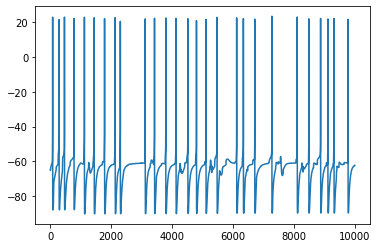

In [35]:
plt.plot(vmv2['time'],vmv2[162344])

In [56]:
stim_start = 0.1 # not zero to be able to calc voltage_base
stim_end = np.max(vmv2.time)-0.1

trace2 = {'T': vmv2['time'], 'V': vmv2[162344], 'stim_start': [stim_start], 'stim_end': [stim_end]}

In [57]:
feature_values2 = efel.getFeatureValues([trace2], ['AP_amplitude','voltage_base', 'peak_time', 'peak_voltage', 
                                                   'AP_begin_time', 'AP_begin_width', 
                                                 'AP_begin_voltage', 'mean_frequency'])[0]


In [58]:
feature_values2 = efel.getFeatureValues([trace2], efel_feats)[0]


In [44]:
feature_values2

{'AHP1_depth_from_peak': array([110.52554893]),
 'AHP2_depth_from_peak': array([109.11109161]),
 'AHP_depth': array([-22.86675262, -22.83628082, -22.80888367, -22.74664307,
        -25.1809845 , -25.16046906, -25.11710358, -25.09707642,
        -25.08139801, -25.06690979, -25.05846405, -25.03784943,
        -25.02386475, -24.97202301, -24.92919922, -24.89794159,
        -24.85031891, -24.7946701 , -24.7884903 , -24.77591705,
        -24.77327728, -24.71181488, -24.69055176, -24.67498016,
        -24.66110992, -24.65901947, -24.64974213]),
 'AHP_depth_abs': array([-87.79404449, -87.76357269, -87.73617554, -87.67393494,
        -90.10827637, -90.08776093, -90.04439545, -90.02436829,
        -90.00868988, -89.99420166, -89.98575592, -89.9651413 ,
        -89.95115662, -89.89931488, -89.85649109, -89.82523346,
        -89.77761078, -89.72196198, -89.71578217, -89.70320892,
        -89.70056915, -89.63910675, -89.61784363, -89.60227203,
        -89.58840179, -89.58631134, -89.577034  ]),
 '

In [32]:
efel_feats

['AHP1_depth_from_peak',
 'AHP2_depth_from_peak',
 'AHP_depth',
 'AHP_depth_abs',
 'AHP_depth_abs_slow',
 'AHP_depth_diff',
 'AHP_depth_from_peak',
 'AHP_slow_time',
 'AHP_time_from_peak',
 'AP1_amp',
 'AP1_begin_voltage',
 'AP1_begin_width',
 'AP1_peak',
 'AP1_width',
 'AP2_AP1_begin_width_diff',
 'AP2_AP1_diff',
 'AP2_AP1_peak_diff',
 'AP2_amp',
 'AP2_begin_voltage',
 'AP2_begin_width',
 'AP2_peak',
 'AP2_width',
 'AP_amplitude',
 'AP_amplitude_change',
 'AP_amplitude_diff',
 'AP_amplitude_from_voltagebase',
 'AP_begin_indices',
 'AP_begin_time',
 'AP_begin_voltage',
 'AP_begin_width',
 'AP_duration',
 'AP_duration_change',
 'AP_duration_half_width',
 'AP_duration_half_width_change',
 'AP_end_indices',
 'AP_fall_indices',
 'AP_fall_rate',
 'AP_fall_rate_change',
 'AP_fall_time',
 'AP_height',
 'AP_phaseslope',
 'AP_phaseslope_AIS',
 'AP_rise_indices',
 'AP_rise_rate',
 'AP_rise_rate_change',
 'AP_rise_time',
 'AP_width',
 'APlast_amp',
 'APlast_width',
 'BAC_maximum_voltage',
 'BAC_w

In [59]:
feature_values2 = {feature_name: np.mean(values) for feature_name, values in feature_values2.items() if values is not None}

In [60]:
feature_values2

{'AHP1_depth_from_peak': 110.52554893493098,
 'AHP2_depth_from_peak': 109.11109161352944,
 'AHP_depth': -24.421392935268326,
 'AHP_depth_abs': -89.51661540841289,
 'AHP_depth_abs_slow': -89.58326965329861,
 'AHP_depth_diff': -0.06857651930047783,
 'AHP_depth_from_peak': 111.53943753667282,
 'AHP_slow_time': 0.03210080180575824,
 'AHP_time_from_peak': 10.31851851853697,
 'AP1_amp': 68.88814735411623,
 'AP1_begin_voltage': -46.15664291381416,
 'AP1_begin_width': 2.0999999999998806,
 'AP1_peak': 22.731504440302075,
 'AP1_width': 1.1808371579786945,
 'AP2_AP1_begin_width_diff': 0.1000000000006196,
 'AP2_AP1_diff': -1.3158054353592092,
 'AP2_AP1_peak_diff': -1.3839855196437298,
 'AP2_amp': 67.57234191875702,
 'AP2_begin_voltage': -46.22482299809867,
 'AP2_begin_width': 2.2000000000005002,
 'AP2_peak': 21.347518920658345,
 'AP2_width': 1.3529686318677006,
 'AP_amplitude': 67.3393912966609,
 'AP_amplitude_change': -0.023346884186900327,
 'AP_amplitude_diff': -0.14782259104365308,
 'AP_amplitu

In [14]:
feature_valuesDiff = {}

for k,v in feature_values.items():
    v2 = feature_values2.get(k, 0)
    dv = []
    
    for i,lv in enumerate(v):
        dv.append(np.median(lv) - np.median(v2[i]))
        
    feature_valuesDiff[k] = dv

In [16]:
feature_valuesDiff.pop('AP_begin_time')
feature_valuesDiff.pop('peak_time')

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 6.599999999993997,
 11.099999999989905,
 13.799999999987449,
 17.099999999984448,
 20.699999999981173,
 13.299999999987904,
 44.39999999995962,
 16.599999999984902,
 51.49999999995316,
 54.49999999995043,
 87.2999999999206,
 87.2999999999206,
 69.39999999993688,
 50.59999999995398,
 80.39999999992688,
 103.59999999990578,
 98.3999999999105,
 117.39999999989323,
 194.50000000054024,
 229.50000000083492,
 217.700000000792,
 215.40000000078362,
 221.5000000008058]

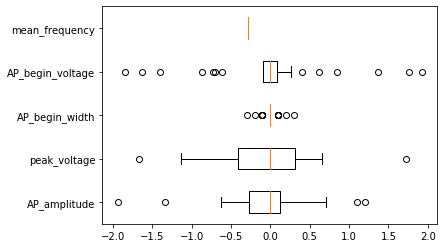

In [17]:
#162344

labels, data = [*zip(*feature_valuesDiff.items())]  # 'transpose' items to parallel key, value lists

plt.boxplot(data,vert=False)
plt.yticks(range(1, len(labels) + 1), labels)
plt.show()

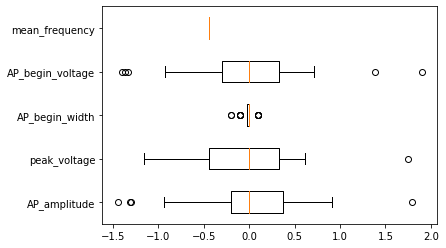

In [94]:
#162344

labels, data = [*zip(*feature_valuesDiff.items())]  # 'transpose' items to parallel key, value lists

plt.boxplot(data,vert=False)
plt.yticks(range(1, len(labels) + 1), labels)
plt.show()

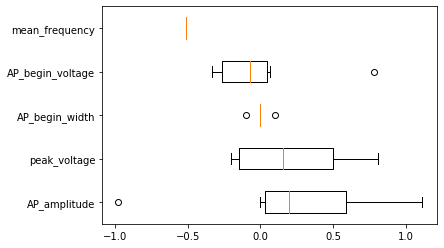

In [89]:
#162516

labels, data = [*zip(*feature_valuesDiff.items())]  # 'transpose' items to parallel key, value lists

plt.boxplot(data,vert=False)
plt.yticks(range(1, len(labels) + 1), labels)
plt.show()

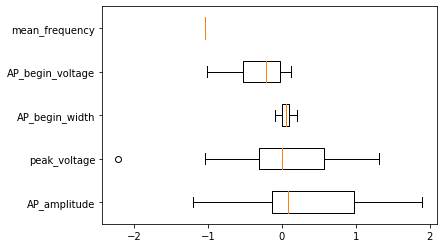

In [84]:
#162420

labels, data = [*zip(*feature_valuesDiff.items())]  # 'transpose' items to parallel key, value lists

plt.boxplot(data,vert=False)
plt.yticks(range(1, len(labels) + 1), labels)
plt.show()

In [14]:
c.cells.get(147861)


x                                                          320.134
y                                                           934.82
z                                                          737.624
orientation      [[1.0, 0.0, 0.0], [0.0, 1.0, 0.0], [0.0, 0.0, ...
etype                                                       cADpyr
layer                                                            5
me_combo         cADpyr_L5TPC_L5_TPC:A_5_dend-C060110A3_axon-ra...
morph_class                                                    PYR
morphology           dend-C060110A3_axon-rat_20160906_E1_LH4_cell1
mtype                                                     L5_TPC:A
region                                                          L5
synapse_class                                                  EXC
Name: 147861, dtype: object

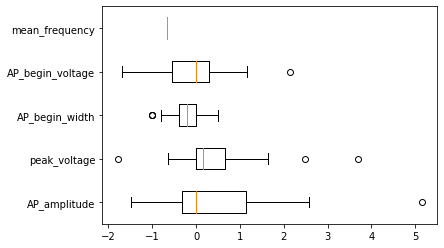

In [18]:
stim_start = 1
stim_end = 5000
trace = {'T': vmv['time'], 'V': vmv['147861'], 'stim_start': [stim_start], 'stim_end': [stim_end]}


feature_values = efel.getFeatureValues([trace], ['AP_amplitude', 'peak_time', 'peak_voltage', 'AP_begin_time', 'AP_begin_width', 
                                                 'AP_begin_voltage', 'mean_frequency'])[0]

feature_values = {feature_name: list(values) for feature_name, values in feature_values.items()}


trace2 = {'T': vmv2['time'], 'V': vmv2['147861'], 'stim_start': [stim_start], 'stim_end': [stim_end]}


feature_values2 = efel.getFeatureValues([trace2], ['AP_amplitude', 'peak_time', 'peak_voltage', 
                                                   'AP_begin_time', 'AP_begin_width', 
                                                 'AP_begin_voltage', 'mean_frequency'])[0]

feature_values2 = {feature_name: list(values) for feature_name, values in feature_values2.items()}



feature_valuesDiff2 = {}

for k,v in feature_values.items():
    v2 = feature_values2.get(k, 0)
    dv = []
    
    for i,lv in enumerate(v):
        dv.append(np.median(lv) - np.median(v2[i]))
        
    feature_valuesDiff2[k] = dv

feature_valuesDiff2.pop('AP_begin_time')
feature_valuesDiff2.pop('peak_time')

#147861

labels2, data2 = [*zip(*feature_valuesDiff2.items())]  # 'transpose' items to parallel key, value lists

plt.boxplot(data2,vert=False)
plt.yticks(range(1, len(labels2) + 1), labels2)
plt.show()

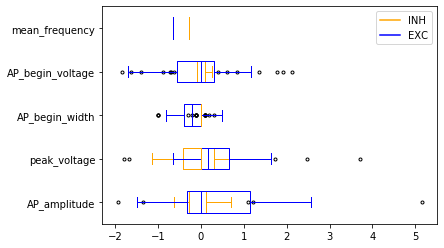

In [34]:
fig = plt.figure()
#ax = plt.axes()

# first boxplot pair
bp1 = plt.boxplot(data,vert=False)
plt.setp(bp1['fliers'], markersize=3.0)
for _, line_list in bp1.items():
    for line in line_list:
        line.set_color('orange')

# second boxplot pair
bp2 = plt.boxplot(data2,vert=False)
plt.setp(bp2['fliers'], markersize=3.0)
for _, line_list in bp2.items():
    for line in line_list:
        line.set_color('b')

plt.yticks(range(1, len(labels2) + 1), labels2)

# draw temporary red and blue lines and use them to create a legend
hB, = plt.plot([1,1],'orange')
hR, = plt.plot([1,1],'b-')
plt.legend((hB, hR),('INH', 'EXC'))
hB.set_visible(False)
hR.set_visible(False)

plt.show()

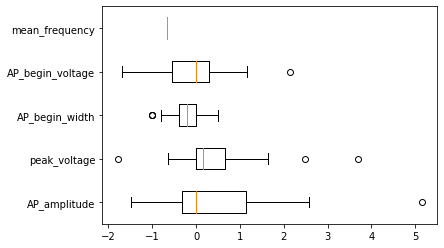

In [16]:
stim_start = 1
stim_end = 5000
trace = {'T': vmv['time'], 'V': vmv['147861'], 'stim_start': [stim_start], 'stim_end': [stim_end]}


feature_values = efel.getFeatureValues([trace], ['AP_amplitude', 'peak_voltage', 'AP_begin_width', 
                                                 'AP_begin_voltage', 'mean_frequency'])[0]

feature_values = {feature_name: list(values) for feature_name, values in feature_values.items()}


trace2 = {'T': vmv2['time'], 'V': vmv2['147861'], 'stim_start': [stim_start], 'stim_end': [stim_end]}


feature_values2 = efel.getFeatureValues([trace2], ['AP_amplitude',  'peak_voltage', 
                                                    'AP_begin_width', 
                                                 'AP_begin_voltage', 'mean_frequency'])[0]

feature_values2 = {feature_name: list(values) for feature_name, values in feature_values2.items()}



feature_valuesDiff = {}

for k,v in feature_values.items():
    v2 = feature_values2.get(k, 0)
    dv = []
    
    for i,lv in enumerate(v):
        dv.append(np.median(lv) - np.median(v2[i]))
        
    feature_valuesDiff[k] = dv

#147861

labels, data = [*zip(*feature_valuesDiff.items())]  # 'transpose' items to parallel key, value lists

plt.boxplot(data,vert=False)
plt.yticks(range(1, len(labels) + 1), labels)
plt.show()

In [18]:
c.cells.get(147943)


x                                                          388.416
y                                                          836.015
z                                                          697.036
orientation      [[1.0, 0.0, 0.0], [0.0, 1.0, 0.0], [0.0, 0.0, ...
etype                                                       cADpyr
layer                                                            5
me_combo         cADpyr_L5TPC_L5_TPC:A_5_dend-GTS070208-P2_axon...
morph_class                                                    PYR
morphology       dend-GTS070208-P2_axon-rp110616_C1_idA_-_Scale...
mtype                                                     L5_TPC:A
region                                                          L5
synapse_class                                                  EXC
Name: 147943, dtype: object

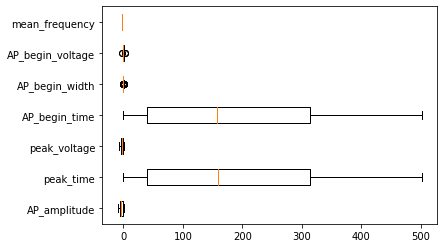

In [13]:
stim_start = 1
stim_end = 5000
trace = {'T': vmv['time'], 'V': vmv['147943'], 'stim_start': [stim_start], 'stim_end': [stim_end]}


feature_values = efel.getFeatureValues([trace], ['AP_amplitude', 'peak_time', 'peak_voltage', 'AP_begin_time', 'AP_begin_width', 
                                                 'AP_begin_voltage', 'mean_frequency'])[0]

feature_values = {feature_name: list(values) for feature_name, values in feature_values.items()}



trace2 = {'T': vmv2['time'], 'V': vmv2['147943'], 'stim_start': [stim_start], 'stim_end': [stim_end]}


feature_values2 = efel.getFeatureValues([trace2], ['AP_amplitude', 'peak_time', 'peak_voltage', 
                                                   'AP_begin_time', 'AP_begin_width', 
                                                 'AP_begin_voltage', 'mean_frequency'])[0]

feature_values2 = {feature_name: list(values) for feature_name, values in feature_values2.items()}



feature_valuesDiff = {}

for k,v in feature_values.items():
    v2 = feature_values2.get(k, 0)
    dv = []
    
    for i,lv in enumerate(v):
        dv.append(np.median(lv) - np.median(v2[i]))
        
    feature_valuesDiff[k] = dv

#147943

labels, data = [*zip(*feature_valuesDiff.items())]  # 'transpose' items to parallel key, value lists

plt.boxplot(data,vert=False)
plt.yticks(range(1, len(labels) + 1), labels)
plt.show()

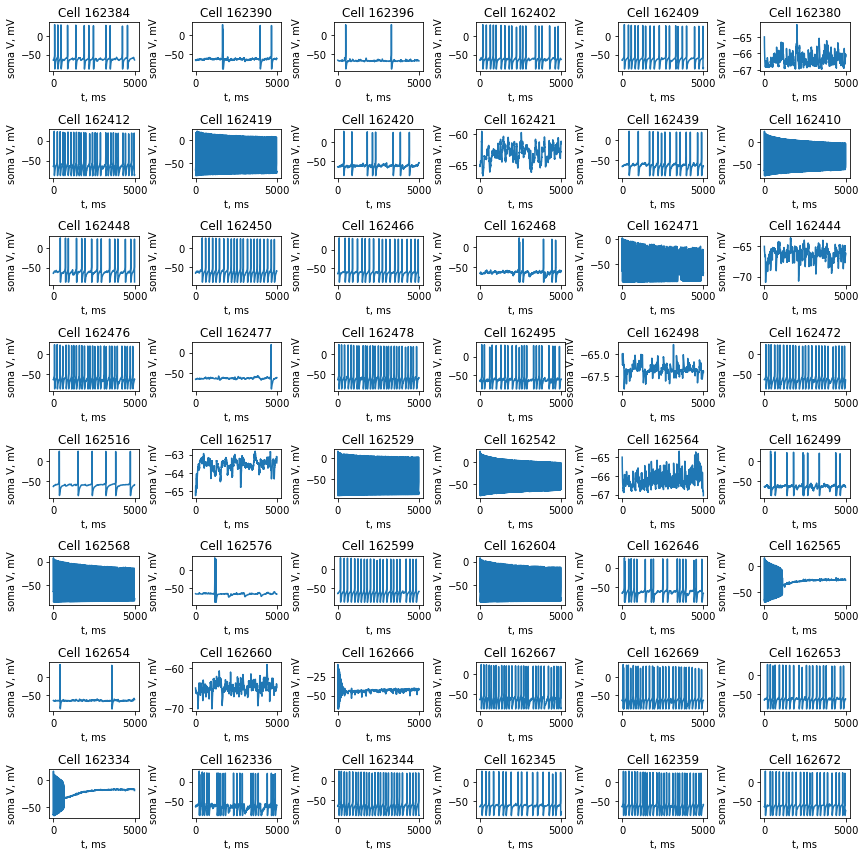

In [15]:
fig, axs = plt.subplots(8,6,figsize=(12,12))

for i,c in enumerate(vmv.loc[:,["time"] + L5mc2_MCstr[0:48]]):
    if i == 0:
        continue
    x = i % 6 -1
    y = i // 6 -1
    axs[y, x].plot(vmv['time'],vmv[c])
    axs[y, x].set_title(f'Cell {c}')

for ax in axs.flat:
    ax.set(xlabel='t, ms', ylabel='soma V, mV')

fig.tight_layout()

plt.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/simulation/full_detailed_sim_p150_v1/l5mc2/plot_vmv_L5mc2_MC_withMet.pdf')
plt.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/simulation/full_detailed_sim_p150_v1/l5mc2/plot_vmv_L5mc2_MC_withMet.png')


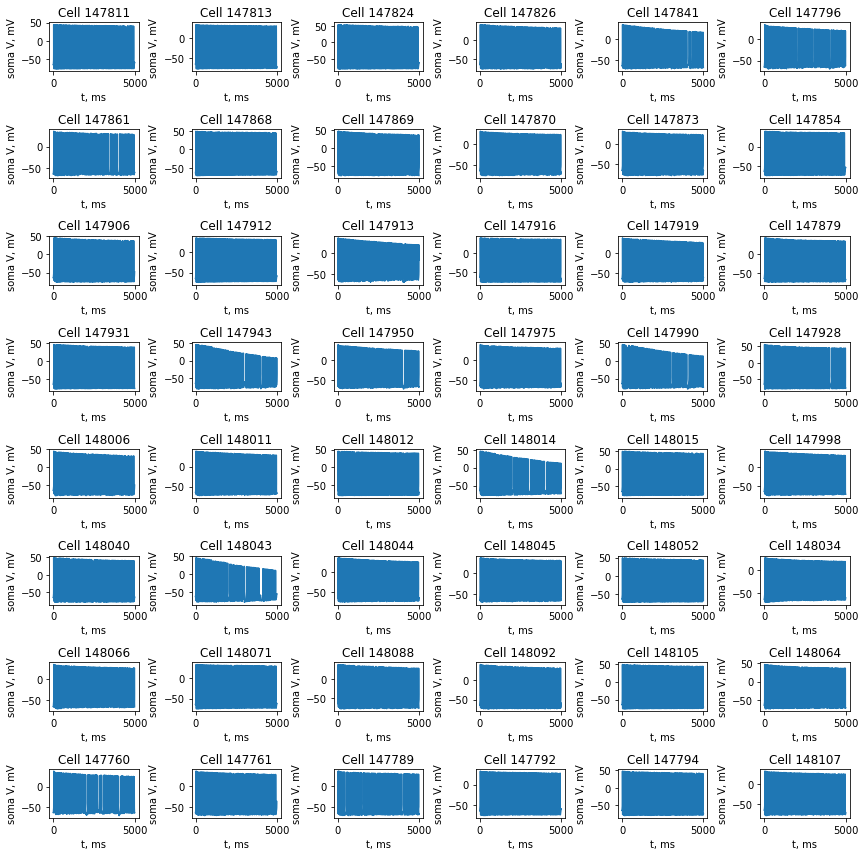

In [16]:
fig, axs = plt.subplots(8,6,figsize=(12,12))

for i,c in enumerate(vmv.loc[:,["time"] + L5mc2_TPC_Astr[0:48]]):
    if i == 0:
        continue
    x = i % 6 -1
    y = i // 6 -1
    axs[y, x].plot(vmv['time'],vmv[c])
    axs[y, x].set_title(f'Cell {c}')

for ax in axs.flat:
    ax.set(xlabel='t, ms', ylabel='soma V, mV')

fig.tight_layout()

plt.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/simulation/full_detailed_sim_p150_v1/l5mc2/plot_vmv_L5mc2_TPCA_withMet.pdf')
plt.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/simulation/full_detailed_sim_p150_v1/l5mc2/plot_vmv_L5mc2_TPCA_withMet.png')


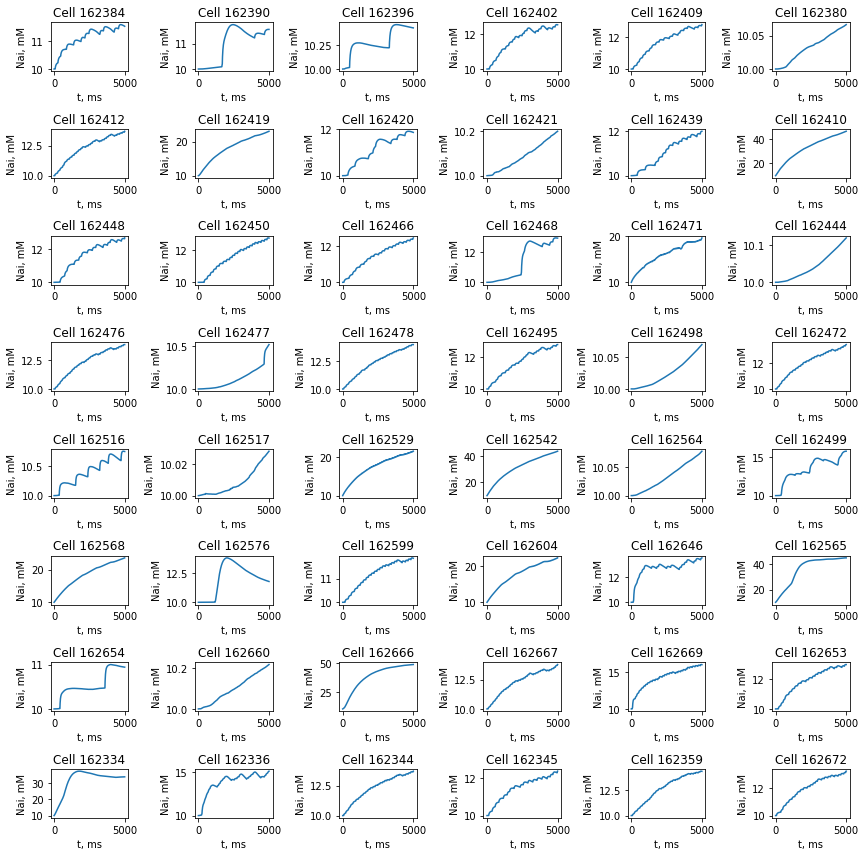

In [9]:
fig, axs = plt.subplots(8,6,figsize=(12,12))

for i,c in enumerate(nai.loc[:,["time"] + L5mc2_MCstr[0:48]]):
    if i == 0:
        continue
    x = i % 6 -1
    y = i // 6 -1
    axs[y, x].plot(nai['time'],nai[c])
    axs[y, x].set_title(f'Cell {c}')

for ax in axs.flat:
    ax.set(xlabel='t, ms', ylabel='Nai, mM')

fig.tight_layout()

#plt.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/simulation/full_detailed_sim_p150_v1/l5mc2/plot_nai_L5mc2_MC_withMet.pdf')
#plt.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/simulation/full_detailed_sim_p150_v1/l5mc2/plot_nai_L5mc2_MC_withMet.png')


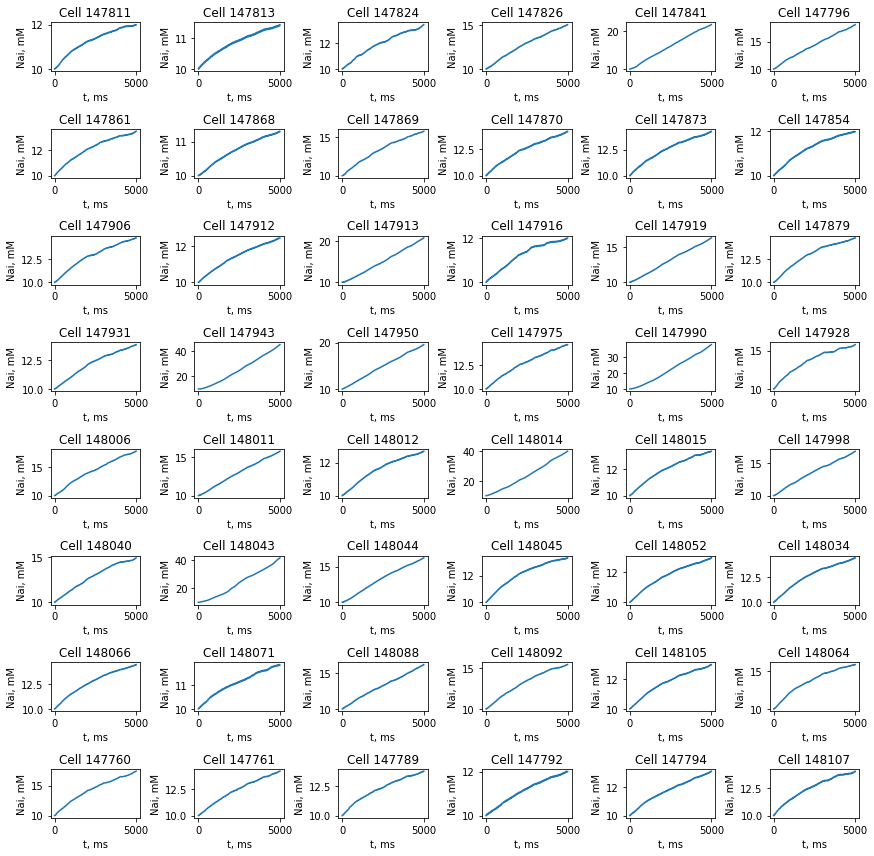

In [10]:
fig, axs = plt.subplots(8,6,figsize=(12,12))

for i,c in enumerate(nai.loc[:,["time"] + L5mc2_TPC_Astr[0:48]]):
    if i == 0:
        continue
    x = i % 6 -1
    y = i // 6 -1
    axs[y, x].plot(nai['time'],nai[c])
    axs[y, x].set_title(f'Cell {c}')

for ax in axs.flat:
    ax.set(xlabel='t, ms', ylabel='Nai, mM')

fig.tight_layout()

#plt.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/simulation/full_detailed_sim_p150_v1/l5mc2/plot_nai_L5mc2_TPCA_withMet.pdf')
#plt.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/simulation/full_detailed_sim_p150_v1/l5mc2/plot_nai_L5mc2_TPCA_withMet.png')


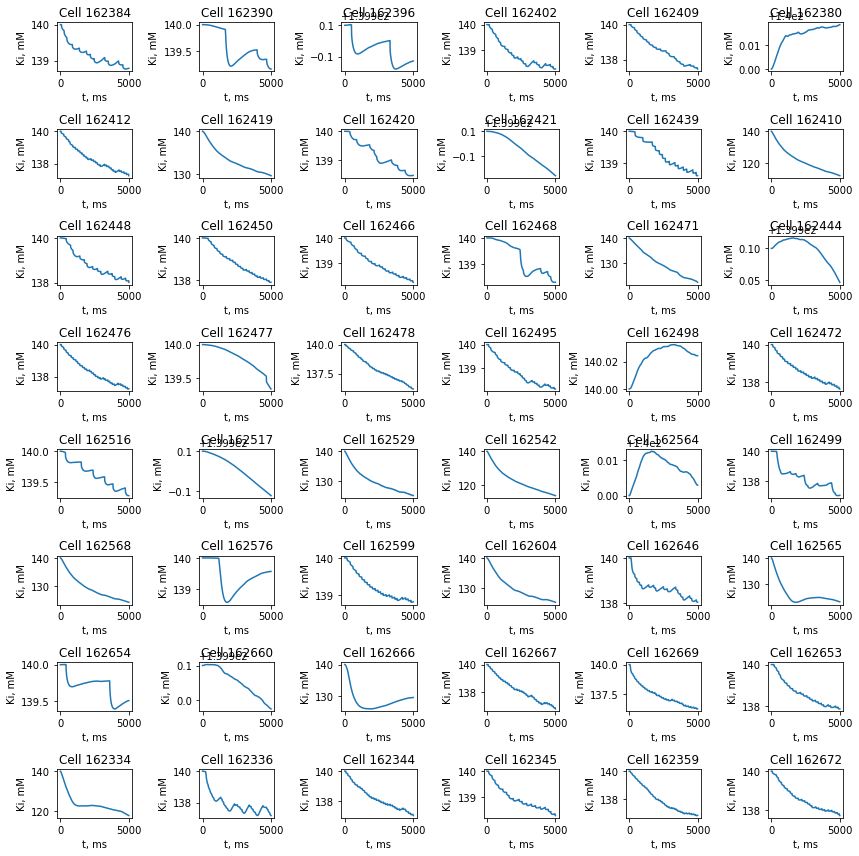

In [19]:
fig, axs = plt.subplots(8,6,figsize=(12,12))

for i,c in enumerate(ki.loc[:,["time"] + L5mc2_MCstr[0:48]]):
    if i == 0:
        continue
    x = i % 6 -1
    y = i // 6 -1
    axs[y, x].plot(ki['time'],ki[c])
    axs[y, x].set_title(f'Cell {c}')

for ax in axs.flat:
    ax.set(xlabel='t, ms', ylabel='Ki, mM')

fig.tight_layout()

plt.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/simulation/full_detailed_sim_p150_v1/l5mc2/plot_ki_L5mc2_MC_withMet.pdf')
plt.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/simulation/full_detailed_sim_p150_v1/l5mc2/plot_ki_L5mc2_MC_withMet.png')


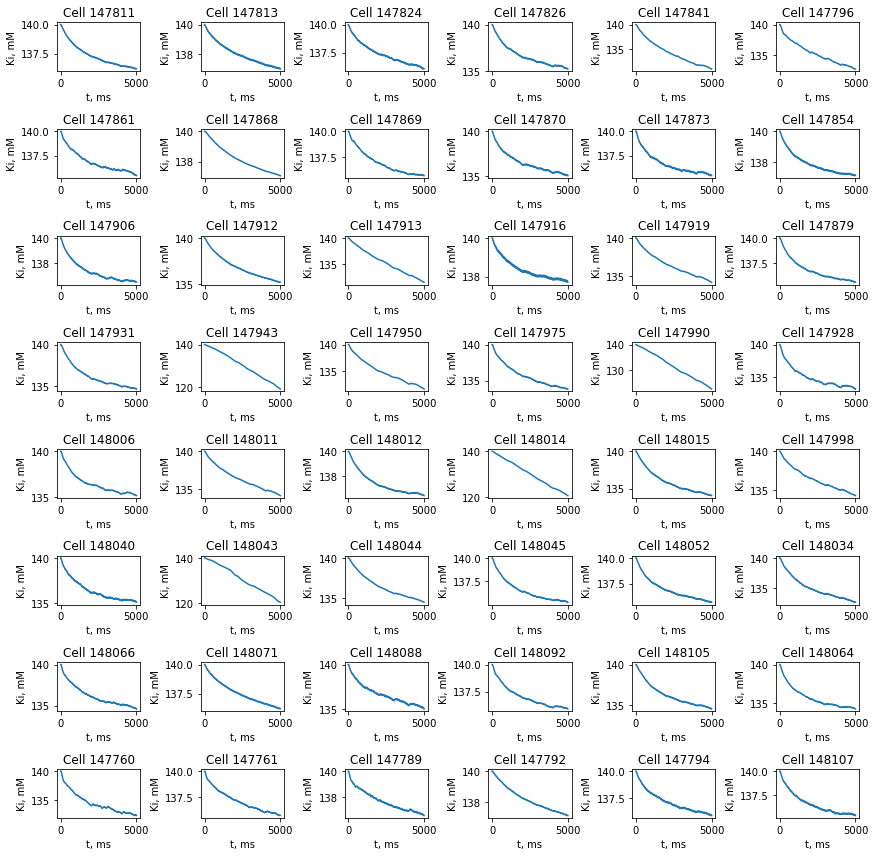

In [20]:
fig, axs = plt.subplots(8,6,figsize=(12,12))

for i,c in enumerate(ki.loc[:,["time"] + L5mc2_TPC_Astr[0:48]]):
    if i == 0:
        continue
    x = i % 6 -1
    y = i // 6 -1
    axs[y, x].plot(ki['time'],ki[c])
    axs[y, x].set_title(f'Cell {c}')

for ax in axs.flat:
    ax.set(xlabel='t, ms', ylabel='Ki, mM')

fig.tight_layout()

plt.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/simulation/full_detailed_sim_p150_v1/l5mc2/plot_ki_L5mc2_TPCA_withMet.pdf')
plt.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/simulation/full_detailed_sim_p150_v1/l5mc2/plot_ki_L5mc2_TPCA_withMet.png')


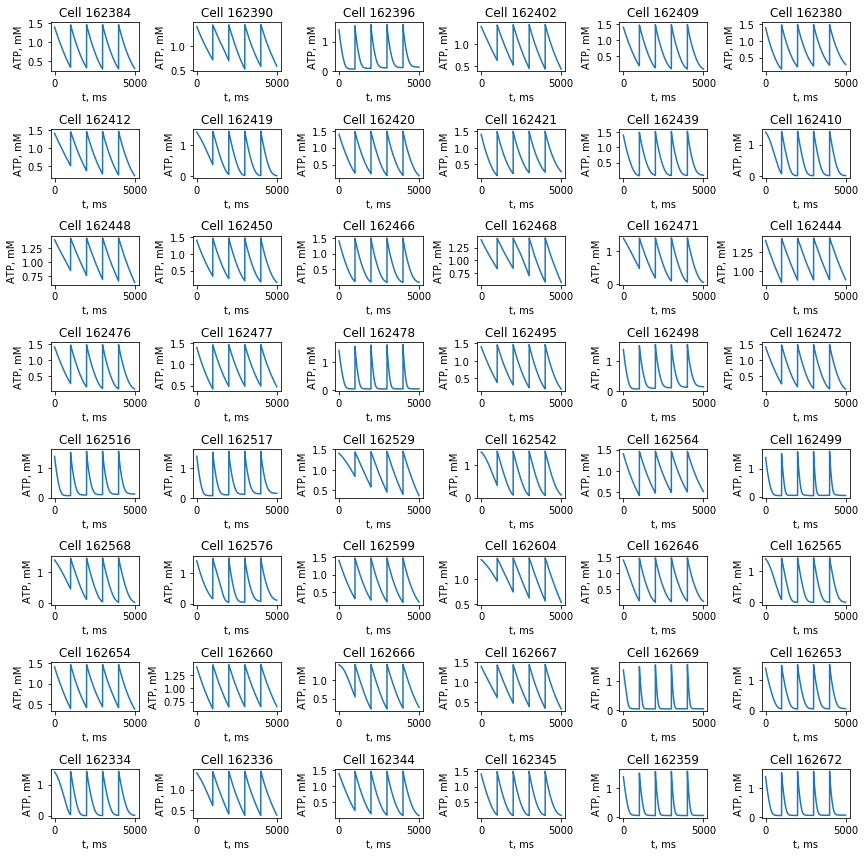

In [11]:
fig, axs = plt.subplots(8,6,figsize=(12,12))

for i,c in enumerate(atp.loc[:,["time"] + L5mc2_MCstr[0:48]]):
    if i == 0:
        continue
    x = i % 6 -1
    y = i // 6 -1
    axs[y, x].plot(atp['time'],atp[c])
    axs[y, x].set_title(f'Cell {c}')

for ax in axs.flat:
    ax.set(xlabel='t, ms', ylabel='ATP, mM')

fig.tight_layout()

#plt.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/simulation/full_detailed_sim_p150_v1/l5mc2/plot_atp_L5mc2_MC_withMet.pdf')
#plt.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/simulation/full_detailed_sim_p150_v1/l5mc2/plot_atp_L5mc2_MC_withMet.png')


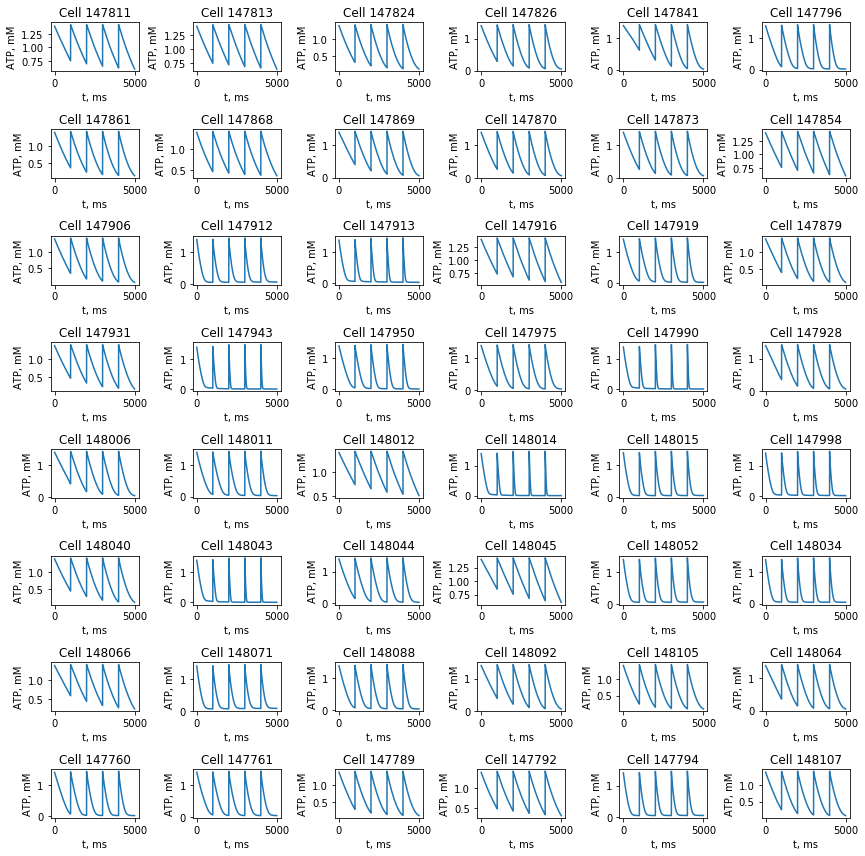

In [12]:
fig, axs = plt.subplots(8,6,figsize=(12,12))

for i,c in enumerate(atp.loc[:,["time"] + L5mc2_TPC_Astr[0:48]]):
    if i == 0:
        continue
    x = i % 6 -1
    y = i // 6 -1
    axs[y, x].plot(atp['time'],atp[c])
    axs[y, x].set_title(f'Cell {c}')

for ax in axs.flat:
    ax.set(xlabel='t, ms', ylabel='ATP, mM')

fig.tight_layout()

#plt.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/simulation/full_detailed_sim_p150_v1/l5mc2/plot_atp_L5mc2_TPCA_withMet.pdf')
#plt.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/simulation/full_detailed_sim_p150_v1/l5mc2/plot_atp_L5mc2_TPCA_withMet.png')


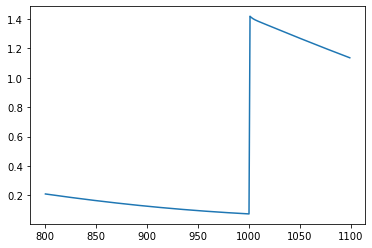

In [30]:
plt.plot(atp.loc[:,"time"][800:1100],atp.loc[:,L5mc2_TPC_Astr[0]][800:1100])

In [22]:
len(atp.columns)

2133

### L5 mc2 MC and TPCA without metab

In [23]:
sim = Simulation('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/simulation/full_detailed_sim_p150_v1/l5mc2_noMet/BlueConfig')
report = sim.report('soma')
data = report.get()
data.to_csv('/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/invivolike/metab_p150_24june2020_L5mc2_MC_TPCA_noMet/out_vmv.txt')

report = sim.report('NaConcAllCmps')
data = report.get()
data.to_csv('/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/invivolike/metab_p150_24june2020_L5mc2_MC_TPCA_noMet/NaConcAllCmps.txt')


report = sim.report('ATPConcAllCmps')
data = report.get()
data.to_csv('/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/invivolike/metab_p150_24june2020_L5mc2_MC_TPCA_noMet/ATPConcAllCmps.txt')


report = sim.report('KConcAllCmps')
data = report.get()
data.to_csv('/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/invivolike/metab_p150_24june2020_L5mc2_MC_TPCA_noMet/KConcAllCmps.txt')


Have keys ({'FlushBufferScalar'}) that are not defined for section: Run
Ignoring unknown key: 'FlushBufferScalar'
Ignoring unknown key: 'FlushBufferScalar'
Ignoring unknown key: 'FlushBufferScalar'
Ignoring unknown key: 'FlushBufferScalar'


In [24]:
vmv = pd.read_csv('/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/invivolike/metab_p150_24june2020_L5mc2_MC_TPCA_noMet/out_vmv.txt')
nai = pd.read_csv('/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/invivolike/metab_p150_24june2020_L5mc2_MC_TPCA_noMet/NaConcAllCmps.txt')
atp = pd.read_csv('/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/invivolike/metab_p150_24june2020_L5mc2_MC_TPCA_noMet/ATPConcAllCmps.txt')
ki = pd.read_csv('/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/invivolike/metab_p150_24june2020_L5mc2_MC_TPCA_noMet/KConcAllCmps.txt')


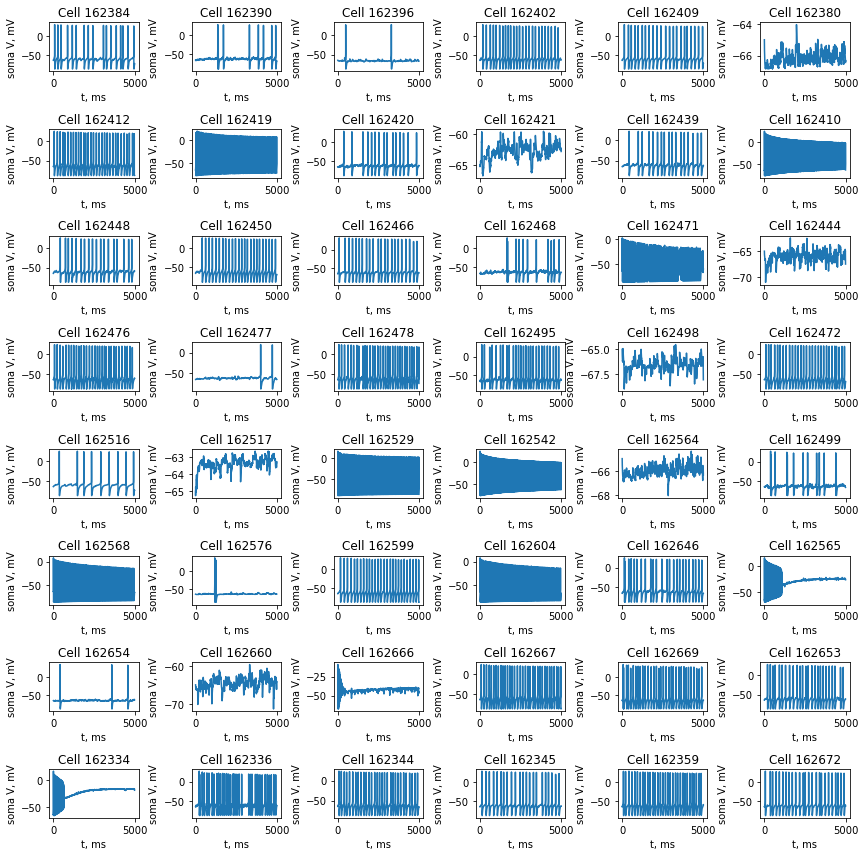

In [25]:
fig, axs = plt.subplots(8,6,figsize=(12,12))

for i,c in enumerate(vmv.loc[:,["time"] + L5mc2_MCstr[0:48]]):
    if i == 0:
        continue
    x = i % 6 -1
    y = i // 6 -1
    axs[y, x].plot(vmv['time'],vmv[c])
    axs[y, x].set_title(f'Cell {c}')

for ax in axs.flat:
    ax.set(xlabel='t, ms', ylabel='soma V, mV')

fig.tight_layout()

plt.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/simulation/full_detailed_sim_p150_v1/l5mc2_noMet/plot_vmv_L5mc2_MC_noMet.pdf')
plt.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/simulation/full_detailed_sim_p150_v1/l5mc2_noMet/plot_vmv_L5mc2_MC_noMet.png')


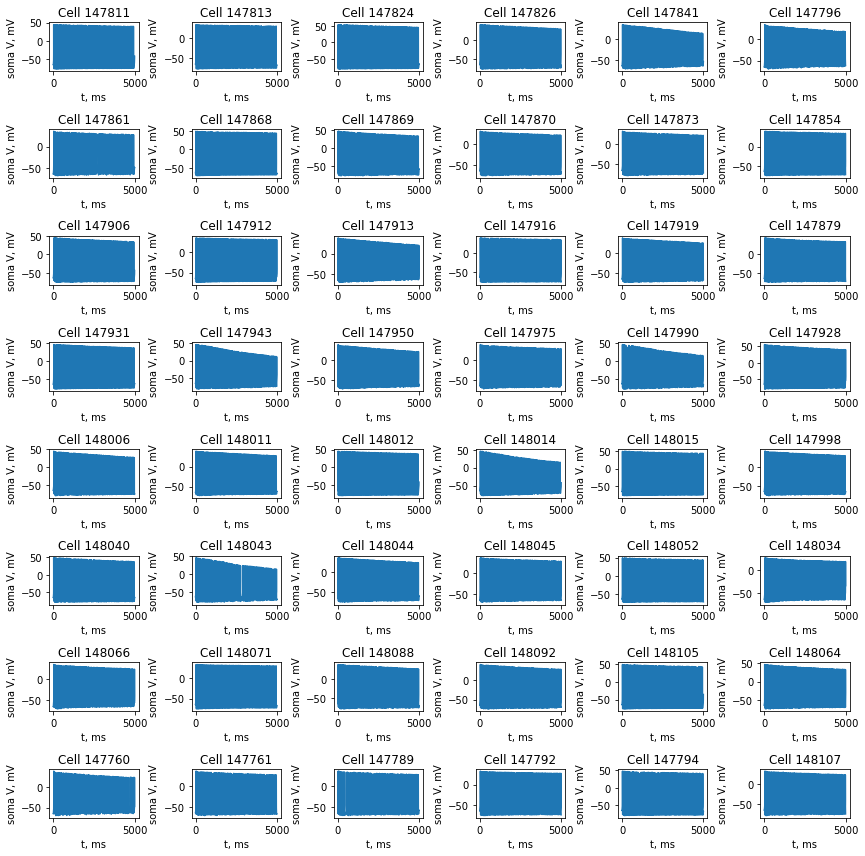

In [26]:
fig, axs = plt.subplots(8,6,figsize=(12,12))

for i,c in enumerate(vmv.loc[:,["time"] + L5mc2_TPC_Astr[0:48]]):
    if i == 0:
        continue
    x = i % 6 -1
    y = i // 6 -1
    axs[y, x].plot(vmv['time'],vmv[c])
    axs[y, x].set_title(f'Cell {c}')

for ax in axs.flat:
    ax.set(xlabel='t, ms', ylabel='soma V, mV')

fig.tight_layout()

plt.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/simulation/full_detailed_sim_p150_v1/l5mc2_noMet/plot_vmv_L5mc2_TPCA_noMet.pdf')
plt.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/simulation/full_detailed_sim_p150_v1/l5mc2_noMet/plot_vmv_L5mc2_TPCA_noMet.png')


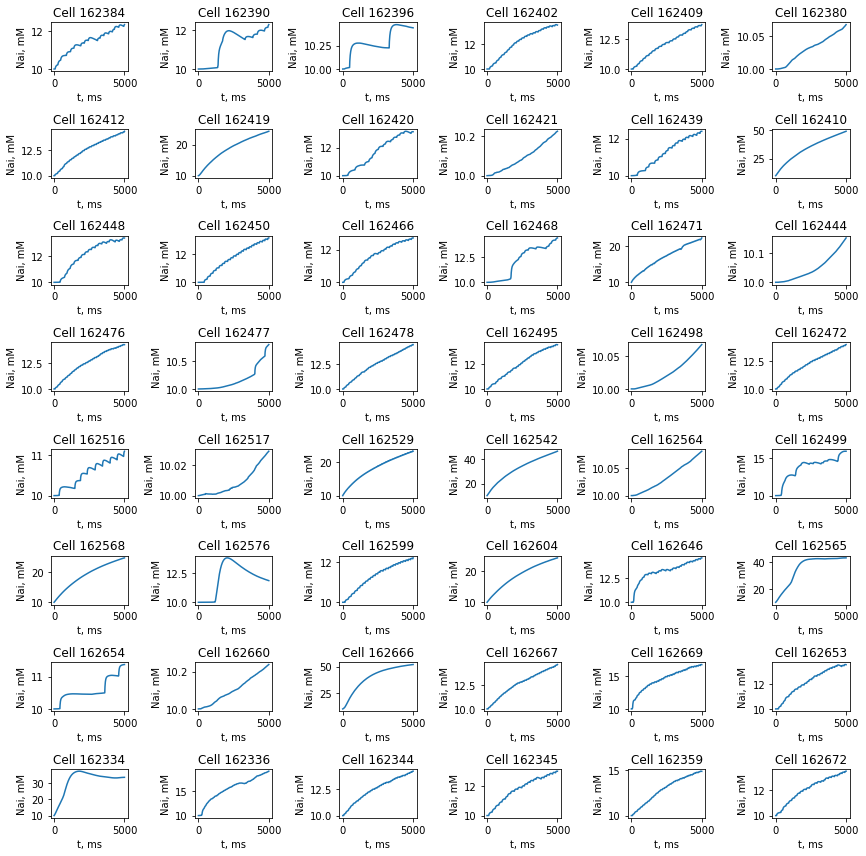

In [27]:
fig, axs = plt.subplots(8,6,figsize=(12,12))

for i,c in enumerate(nai.loc[:,["time"] + L5mc2_MCstr[0:48]]):
    if i == 0:
        continue
    x = i % 6 -1
    y = i // 6 -1
    axs[y, x].plot(nai['time'],nai[c])
    axs[y, x].set_title(f'Cell {c}')

for ax in axs.flat:
    ax.set(xlabel='t, ms', ylabel='Nai, mM')

fig.tight_layout()

plt.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/simulation/full_detailed_sim_p150_v1/l5mc2_noMet/plot_nai_L5mc2_MC_noMet.pdf')
plt.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/simulation/full_detailed_sim_p150_v1/l5mc2_noMet/plot_nai_L5mc2_MC_noMet.png')


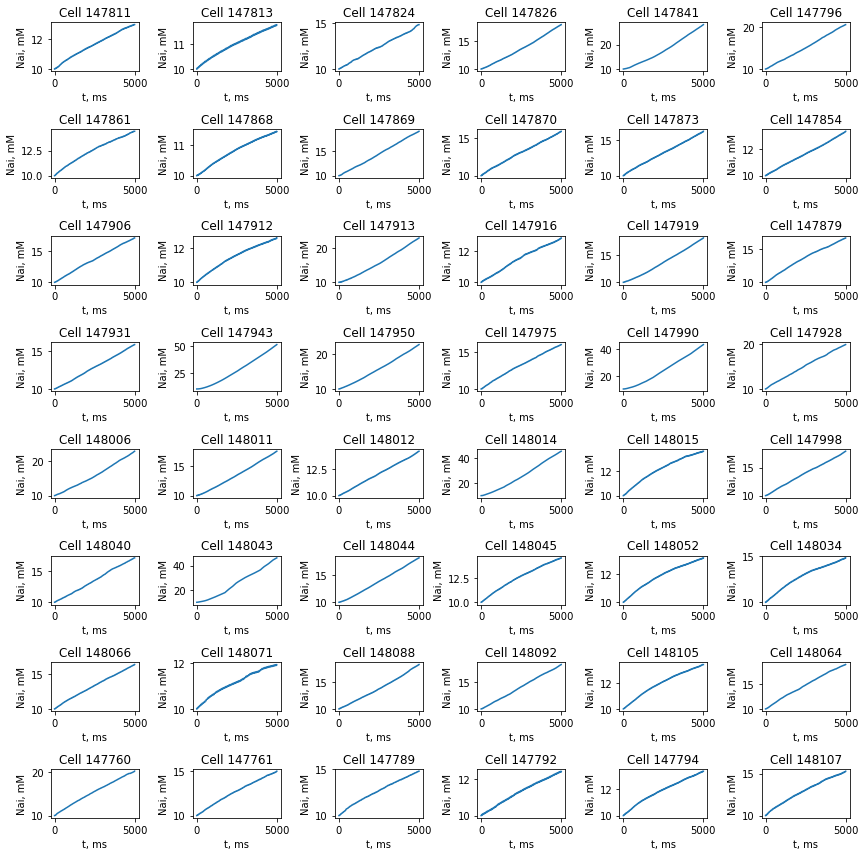

In [28]:
fig, axs = plt.subplots(8,6,figsize=(12,12))

for i,c in enumerate(nai.loc[:,["time"] + L5mc2_TPC_Astr[0:48]]):
    if i == 0:
        continue
    x = i % 6 -1
    y = i // 6 -1
    axs[y, x].plot(nai['time'],nai[c])
    axs[y, x].set_title(f'Cell {c}')

for ax in axs.flat:
    ax.set(xlabel='t, ms', ylabel='Nai, mM')

fig.tight_layout()

plt.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/simulation/full_detailed_sim_p150_v1/l5mc2_noMet/plot_nai_L5mc2_TPCA_noMet.pdf')
plt.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/simulation/full_detailed_sim_p150_v1/l5mc2_noMet/plot_nai_L5mc2_TPCA_noMet.png')


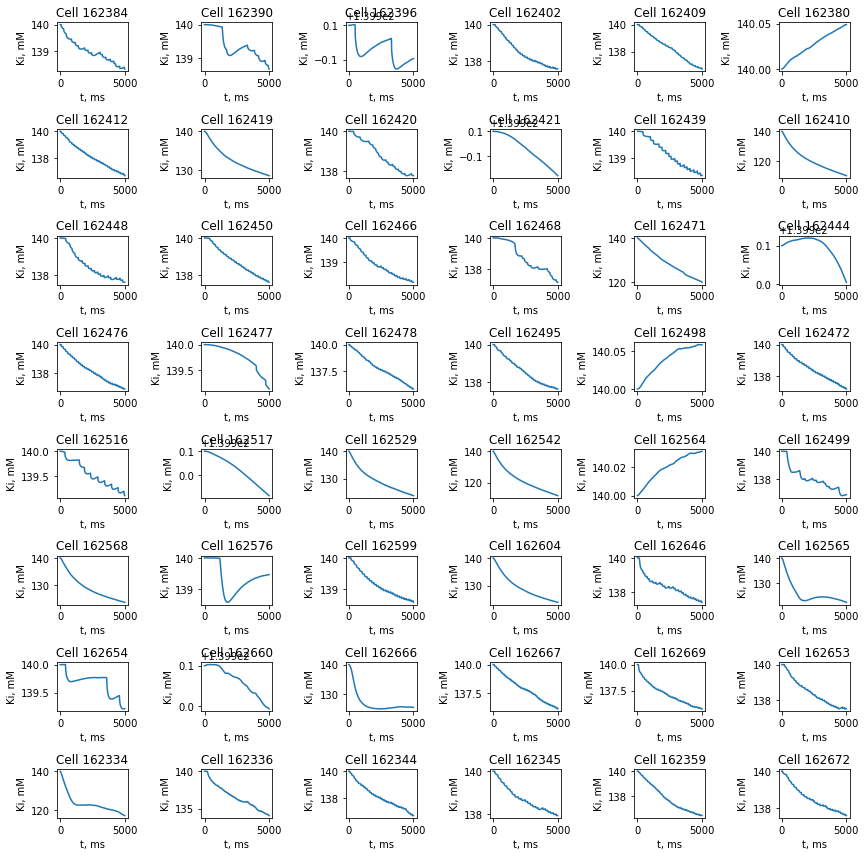

In [29]:
fig, axs = plt.subplots(8,6,figsize=(12,12))

for i,c in enumerate(ki.loc[:,["time"] + L5mc2_MCstr[0:48]]):
    if i == 0:
        continue
    x = i % 6 -1
    y = i // 6 -1
    axs[y, x].plot(ki['time'],ki[c])
    axs[y, x].set_title(f'Cell {c}')

for ax in axs.flat:
    ax.set(xlabel='t, ms', ylabel='Ki, mM')

fig.tight_layout()

plt.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/simulation/full_detailed_sim_p150_v1/l5mc2_noMet/plot_ki_L5mc2_MC_noMet.pdf')
plt.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/simulation/full_detailed_sim_p150_v1/l5mc2_noMet/plot_ki_L5mc2_MC_noMet.png')


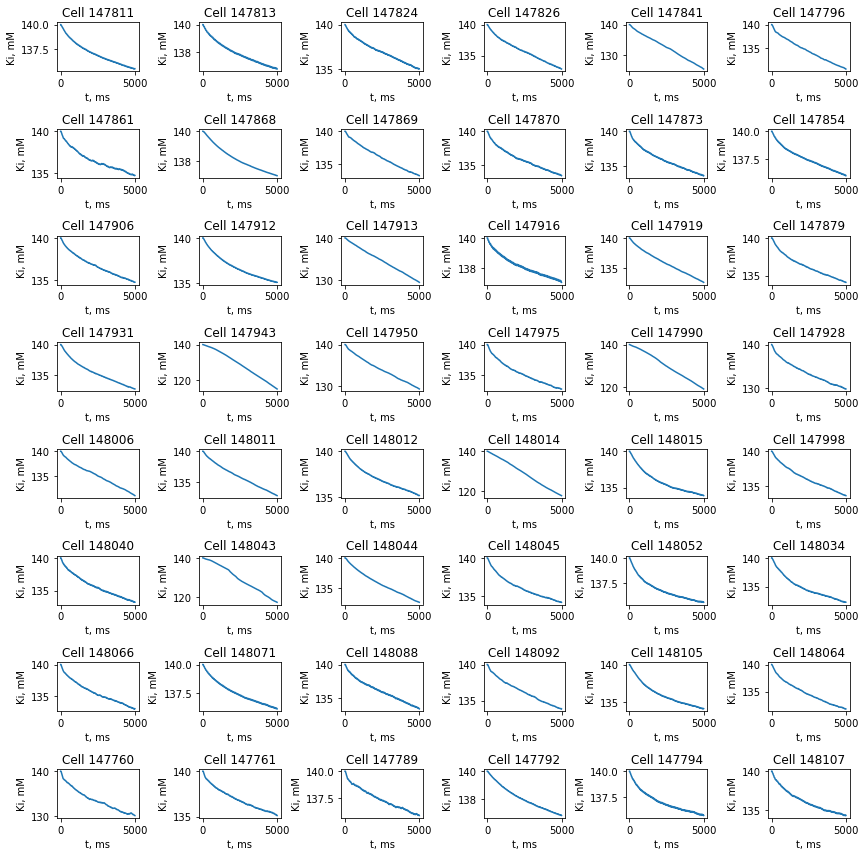

In [30]:
fig, axs = plt.subplots(8,6,figsize=(12,12))

for i,c in enumerate(ki.loc[:,["time"] + L5mc2_TPC_Astr[0:48]]):
    if i == 0:
        continue
    x = i % 6 -1
    y = i // 6 -1
    axs[y, x].plot(ki['time'],ki[c])
    axs[y, x].set_title(f'Cell {c}')

for ax in axs.flat:
    ax.set(xlabel='t, ms', ylabel='Ki, mM')

fig.tight_layout()

plt.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/simulation/full_detailed_sim_p150_v1/l5mc2_noMet/plot_ki_L5mc2_TPCA_noMet.pdf')
plt.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/simulation/full_detailed_sim_p150_v1/l5mc2_noMet/plot_ki_L5mc2_TPCA_noMet.png')


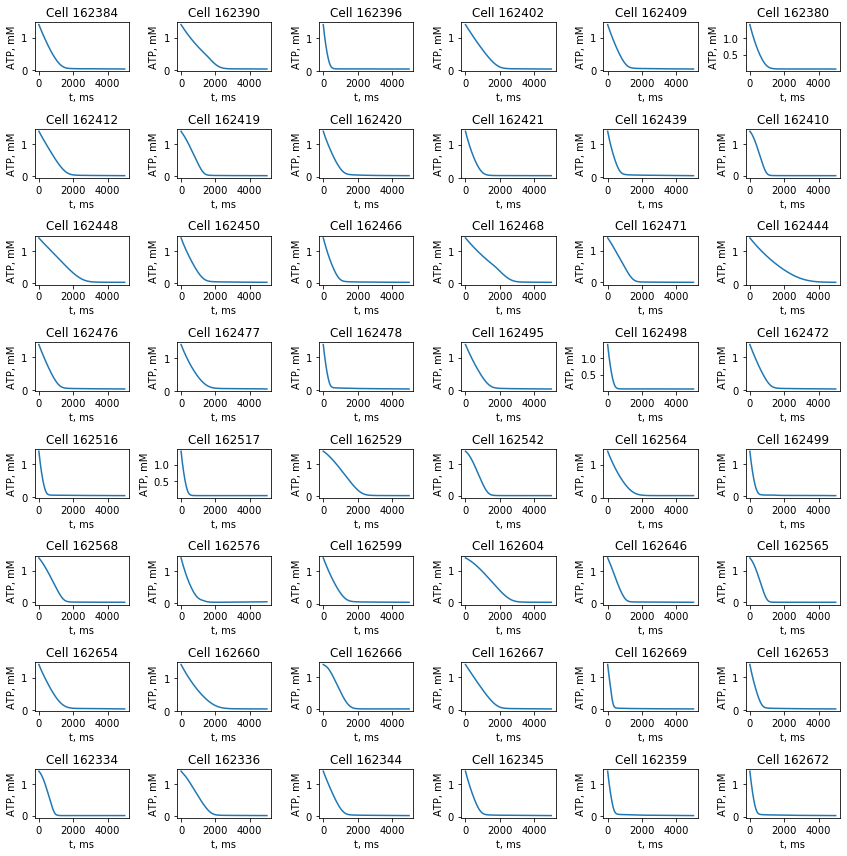

In [31]:
fig, axs = plt.subplots(8,6,figsize=(12,12))

for i,c in enumerate(atp.loc[:,["time"] + L5mc2_MCstr[0:48]]):
    if i == 0:
        continue
    x = i % 6 -1
    y = i // 6 -1
    axs[y, x].plot(atp['time'],atp[c])
    axs[y, x].set_title(f'Cell {c}')

for ax in axs.flat:
    ax.set(xlabel='t, ms', ylabel='ATP, mM')

fig.tight_layout()

plt.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/simulation/full_detailed_sim_p150_v1/l5mc2_noMet/plot_atp_L5mc2_MC_noMet.pdf')
plt.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/simulation/full_detailed_sim_p150_v1/l5mc2_noMet/plot_atp_L5mc2_MC_noMet.png')


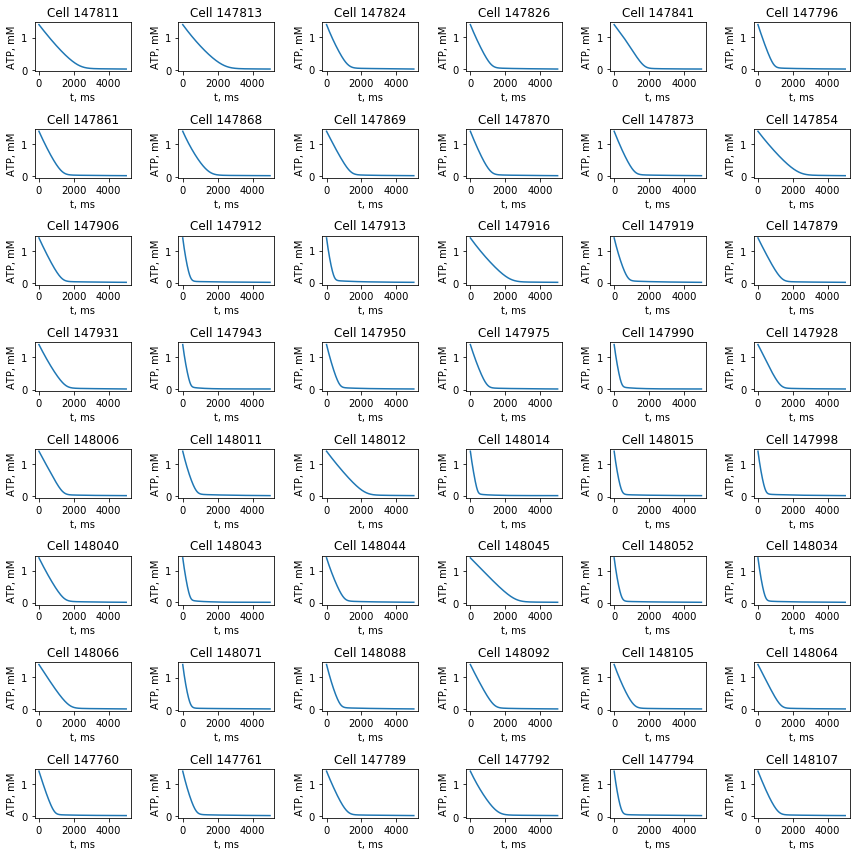

In [32]:
fig, axs = plt.subplots(8,6,figsize=(12,12))

for i,c in enumerate(atp.loc[:,["time"] + L5mc2_TPC_Astr[0:48]]):
    if i == 0:
        continue
    x = i % 6 -1
    y = i // 6 -1
    axs[y, x].plot(atp['time'],atp[c])
    axs[y, x].set_title(f'Cell {c}')

for ax in axs.flat:
    ax.set(xlabel='t, ms', ylabel='ATP, mM')

fig.tight_layout()

plt.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/simulation/full_detailed_sim_p150_v1/l5mc2_noMet/plot_atp_L5mc2_TPCA_noMet.pdf')
plt.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/simulation/full_detailed_sim_p150_v1/l5mc2_noMet/plot_atp_L5mc2_TPCA_noMet.png')


In [31]:
outs_r_glut_withMet = pd.read_csv('/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/outs_r_glut_withMet_202006250820.tsv',header=None,sep='\t')

outs_r_gaba_withMet = pd.read_csv('/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/outs_r_gaba_withMet_202006250820.tsv',header=None,sep='\t')


outs_r_glut_noMet = pd.read_csv('/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/outs_r_glut_noMet_202006250821.tsv',header=None,sep='\t')

outs_r_gaba_noMet = pd.read_csv('/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/outs_r_gaba_noMet_202006250821.tsv',header=None,sep='\t')




In [32]:
outs_r_glut_withMet['time, ms'] = 1000*(outs_r_glut_withMet[0]+1)
outs_r_gaba_withMet['time, ms'] = 1000*(outs_r_gaba_withMet[0]+1)

outs_r_glut_noMet['time, ms'] = 1000*(outs_r_glut_noMet[0]+1)
outs_r_gaba_noMet['time, ms'] = 1000*(outs_r_gaba_noMet[0]+1)

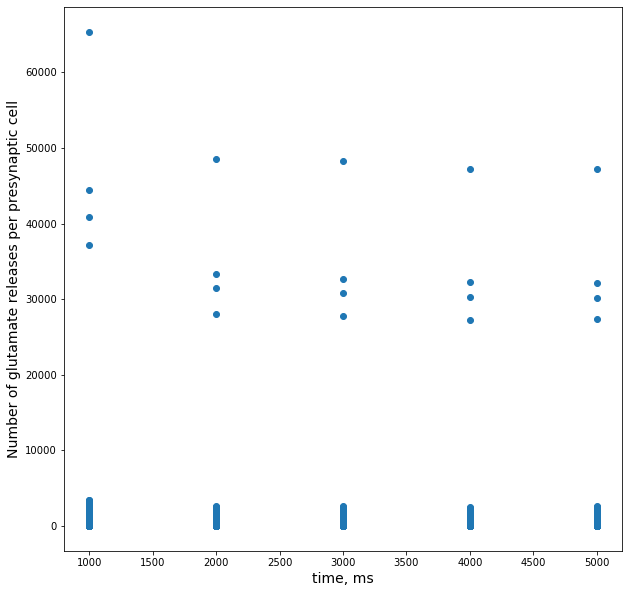

In [33]:
fig = plt.figure(figsize=(10,10))

plt.plot(outs_r_glut_withMet['time, ms'],outs_r_glut_withMet[2],'o')

plt.xlabel('time, ms', fontsize=14)
plt.ylabel('Number of glutamate releases per presynaptic cell', fontsize=14)

plt.show()

#fig.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/plot_p150_outs_r_glutamatereleases_24june2020.pdf')
#fig.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/plot_p150_outs_r_glutamatereleases_24june2020.png')


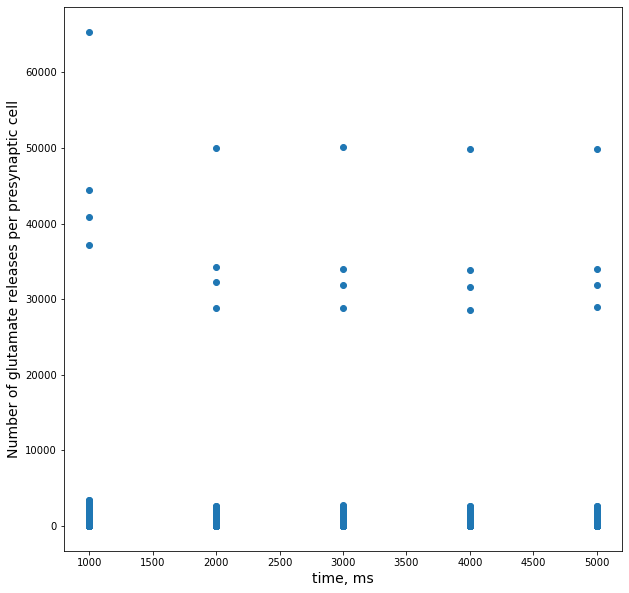

In [34]:
fig = plt.figure(figsize=(10,10))

plt.plot(outs_r_glut_noMet['time, ms'],outs_r_glut_noMet[2],'o')

plt.xlabel('time, ms', fontsize=14)
plt.ylabel('Number of glutamate releases per presynaptic cell', fontsize=14)

plt.show()

#fig.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/plot_p150_outs_r_glutamatereleases_24june2020.pdf')
#fig.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/plot_p150_outs_r_glutamatereleases_24june2020.png')


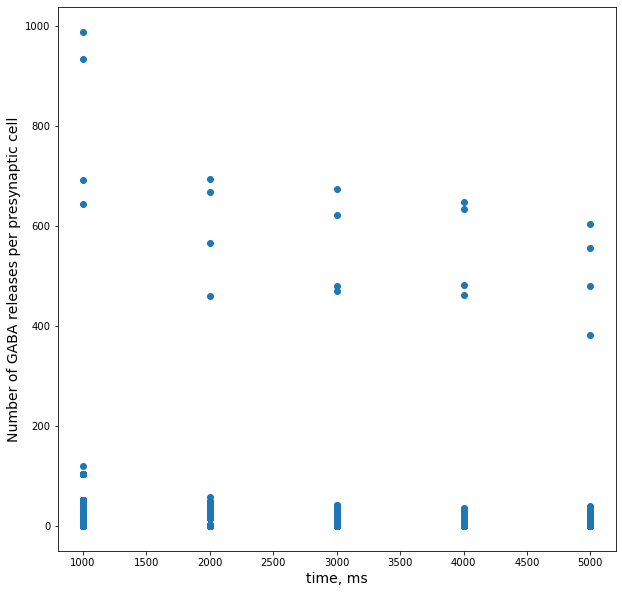

In [35]:
fig = plt.figure(figsize=(10,10))

plt.plot(outs_r_gaba_withMet['time, ms'],outs_r_gaba_withMet[2],'o')

plt.xlabel('time, ms', fontsize=14)
plt.ylabel('Number of GABA releases per presynaptic cell', fontsize=14)

plt.show()

#fig.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/plot_p150_outs_r_gabareleases_24june2020.pdf')
#fig.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/plot_p150_outs_r_gabareleases_24june2020.png')


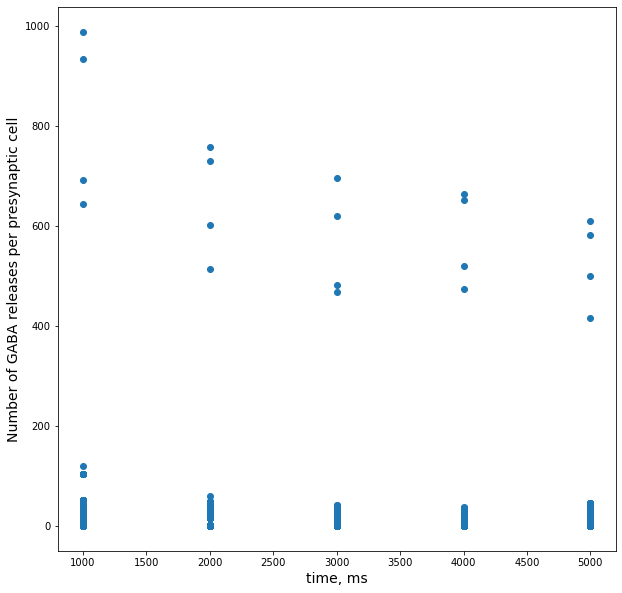

In [36]:
fig = plt.figure(figsize=(10,10))

plt.plot(outs_r_gaba_noMet['time, ms'],outs_r_gaba_noMet[2],'o')

plt.xlabel('time, ms', fontsize=14)
plt.ylabel('Number of GABA releases per presynaptic cell', fontsize=14)

plt.show()

#fig.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/plot_p150_outs_r_gabareleases_24june2020.pdf')
#fig.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/plot_p150_outs_r_gabareleases_24june2020.png')


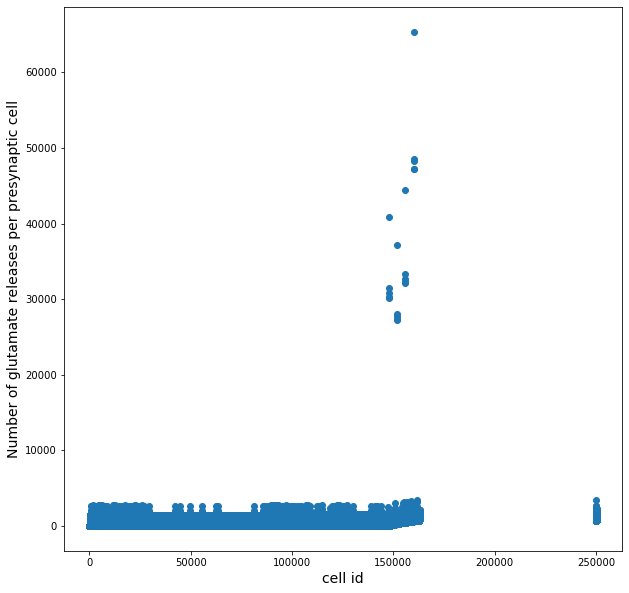

In [37]:
fig = plt.figure(figsize=(10,10))

plt.plot(outs_r_glut_withMet[1],outs_r_glut_withMet[2],'o')

plt.xlabel('cell id', fontsize=14)
plt.ylabel('Number of glutamate releases per presynaptic cell', fontsize=14)

plt.show()

#fig.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/plot_full_detailed_sim_p150_v1_calcium_mc2_nometab_outs_r_glutamatereleases_perCell.pdf')
#fig.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/plot_full_detailed_sim_p150_v1_calcium_mc2_nometab_outs_r_glutamatereleases_perCell.png')


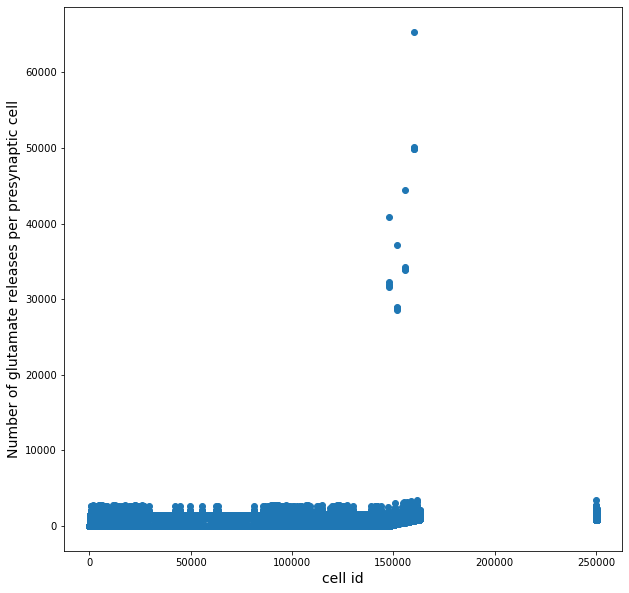

In [38]:
fig = plt.figure(figsize=(10,10))

plt.plot(outs_r_glut_noMet[1],outs_r_glut_noMet[2],'o')

plt.xlabel('cell id', fontsize=14)
plt.ylabel('Number of glutamate releases per presynaptic cell', fontsize=14)

plt.show()

#fig.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/plot_full_detailed_sim_p150_v1_calcium_mc2_nometab_outs_r_glutamatereleases_perCell.pdf')
#fig.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/plot_full_detailed_sim_p150_v1_calcium_mc2_nometab_outs_r_glutamatereleases_perCell.png')


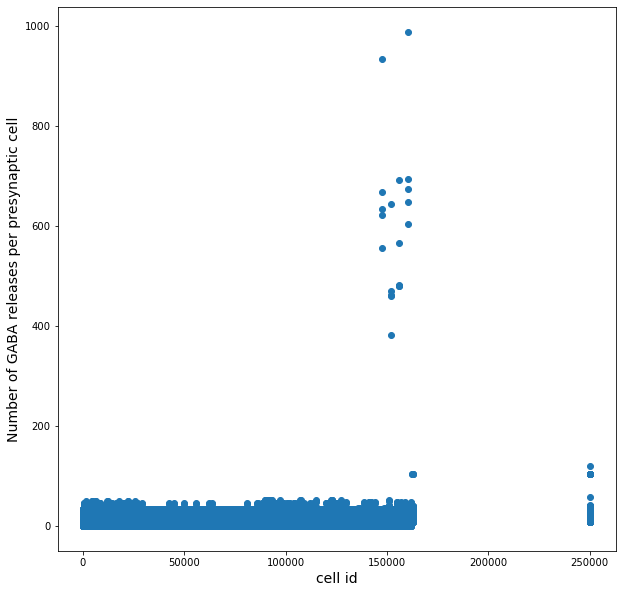

In [39]:
fig = plt.figure(figsize=(10,10))

plt.plot(outs_r_gaba_withMet[1],outs_r_gaba_withMet[2],'o')

plt.xlabel('cell id', fontsize=14)
plt.ylabel('Number of GABA releases per presynaptic cell', fontsize=14)

plt.show()

#fig.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/plot_full_detailed_sim_p150_v1_calcium_mc2_nometab_outs_r_glutamatereleases_perCell.pdf')
#fig.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/plot_full_detailed_sim_p150_v1_calcium_mc2_nometab_outs_r_glutamatereleases_perCell.png')


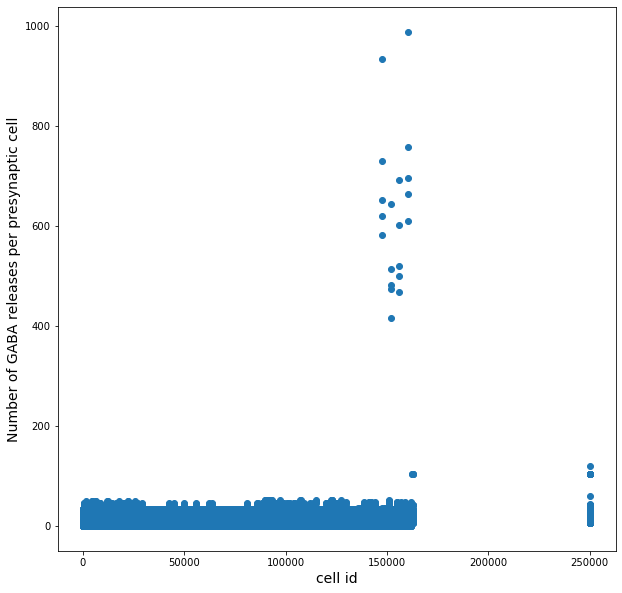

In [40]:
fig = plt.figure(figsize=(10,10))

plt.plot(outs_r_gaba_noMet[1],outs_r_gaba_noMet[2],'o')

plt.xlabel('cell id', fontsize=14)
plt.ylabel('Number of GABA releases per presynaptic cell', fontsize=14)

plt.show()

#fig.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/plot_full_detailed_sim_p150_v1_calcium_mc2_nometab_outs_r_glutamatereleases_perCell.pdf')
#fig.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/plot_full_detailed_sim_p150_v1_calcium_mc2_nometab_outs_r_glutamatereleases_perCell.png')


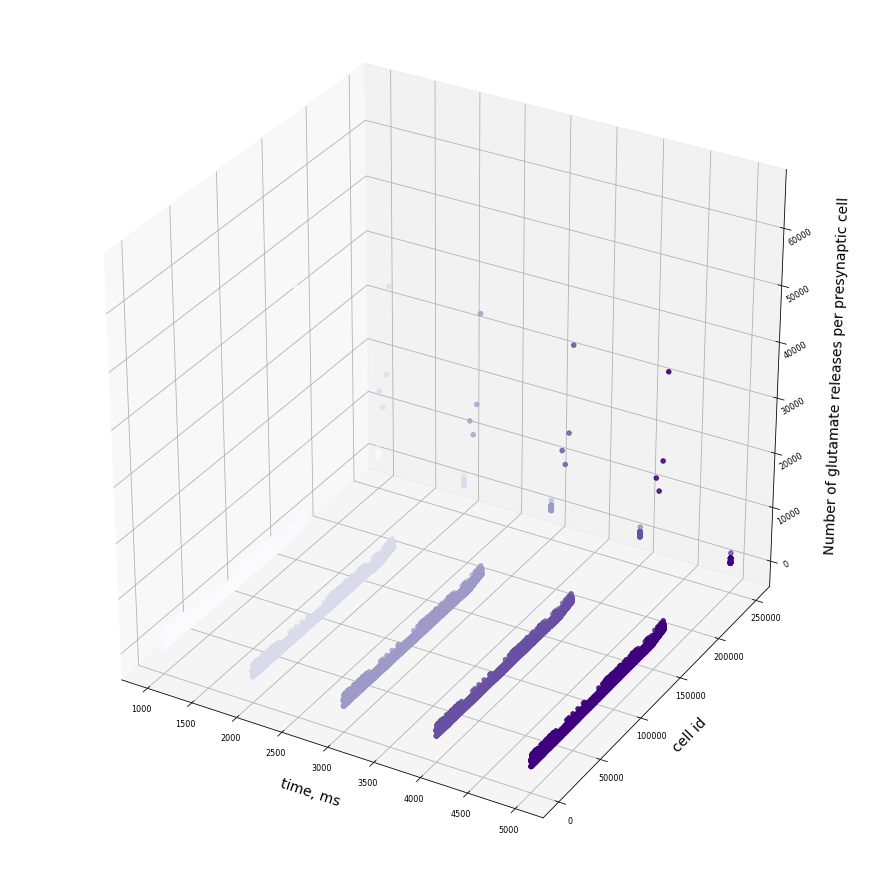

In [41]:
from mpl_toolkits.mplot3d import Axes3D  

fig = plt.figure(figsize=(12,12))
ax = Axes3D(fig)

xs = outs_r_glut_withMet['time, ms']
ys = outs_r_glut_withMet[1]
zs = outs_r_glut_withMet[2]

ax.scatter(xs, ys, zs, marker='o',c=xs, cmap=plt.cm.Purples)


ax.set_xlabel('time, ms',labelpad=10,fontsize=14)
ax.set_ylabel('cell id',labelpad=10,fontsize=14)
ax.set_zlabel('Number of glutamate releases per presynaptic cell',labelpad=21,fontsize=14)

ax.tick_params(axis="x", labelsize=8)
ax.tick_params(axis="y", labelsize=8)
ax.tick_params(axis="z", labelsize=8, labelrotation=30)

plt.show()

#fig.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/plot_full_detailed_sim_p150_v1_calcium_mc2_nometab_outs_r_glutamatereleases_3d.pdf')
#fig.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/plot_full_detailed_sim_p150_v1_calcium_mc2_nometab_outs_r_glutamatereleases_3d.png')


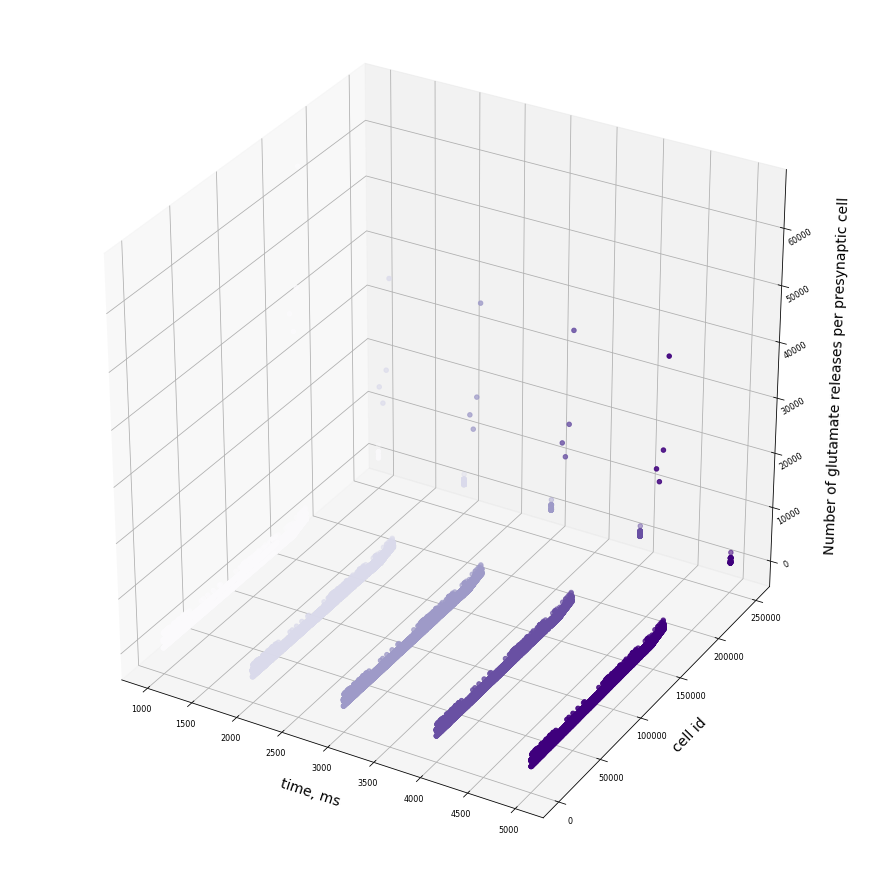

In [42]:
from mpl_toolkits.mplot3d import Axes3D  

fig = plt.figure(figsize=(12,12))
ax = Axes3D(fig)

xs = outs_r_glut_noMet['time, ms']
ys = outs_r_glut_noMet[1]
zs = outs_r_glut_noMet[2]

ax.scatter(xs, ys, zs, marker='o',c=xs, cmap=plt.cm.Purples)


ax.set_xlabel('time, ms',labelpad=10,fontsize=14)
ax.set_ylabel('cell id',labelpad=10,fontsize=14)
ax.set_zlabel('Number of glutamate releases per presynaptic cell',labelpad=21,fontsize=14)

ax.tick_params(axis="x", labelsize=8)
ax.tick_params(axis="y", labelsize=8)
ax.tick_params(axis="z", labelsize=8, labelrotation=30)

plt.show()

#fig.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/plot_full_detailed_sim_p150_v1_calcium_mc2_nometab_outs_r_glutamatereleases_3d.pdf')
#fig.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/plot_full_detailed_sim_p150_v1_calcium_mc2_nometab_outs_r_glutamatereleases_3d.png')


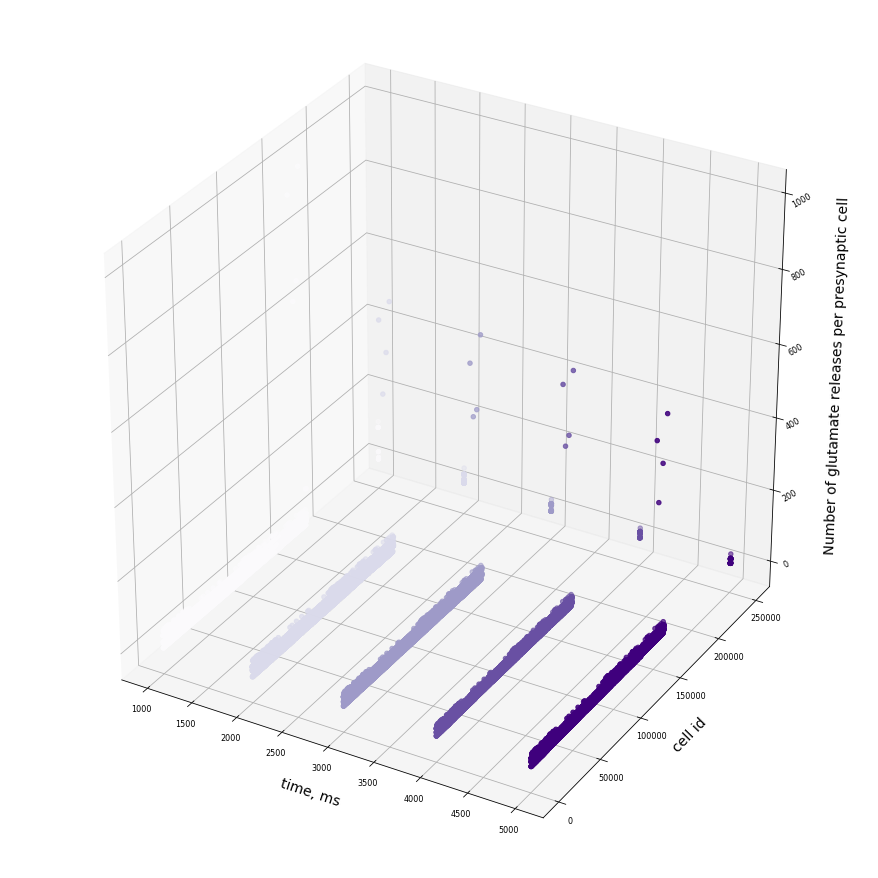

In [43]:
from mpl_toolkits.mplot3d import Axes3D  

fig = plt.figure(figsize=(12,12))
ax = Axes3D(fig)

xs = outs_r_gaba_withMet['time, ms']
ys = outs_r_gaba_withMet[1]
zs = outs_r_gaba_withMet[2]

ax.scatter(xs, ys, zs, marker='o',c=xs, cmap=plt.cm.Purples)


ax.set_xlabel('time, ms',labelpad=10,fontsize=14)
ax.set_ylabel('cell id',labelpad=10,fontsize=14)
ax.set_zlabel('Number of glutamate releases per presynaptic cell',labelpad=21,fontsize=14)

ax.tick_params(axis="x", labelsize=8)
ax.tick_params(axis="y", labelsize=8)
ax.tick_params(axis="z", labelsize=8, labelrotation=30)

plt.show()

#fig.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/plot_full_detailed_sim_p150_v1_calcium_mc2_nometab_outs_r_glutamatereleases_3d.pdf')
#fig.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/plot_full_detailed_sim_p150_v1_calcium_mc2_nometab_outs_r_glutamatereleases_3d.png')


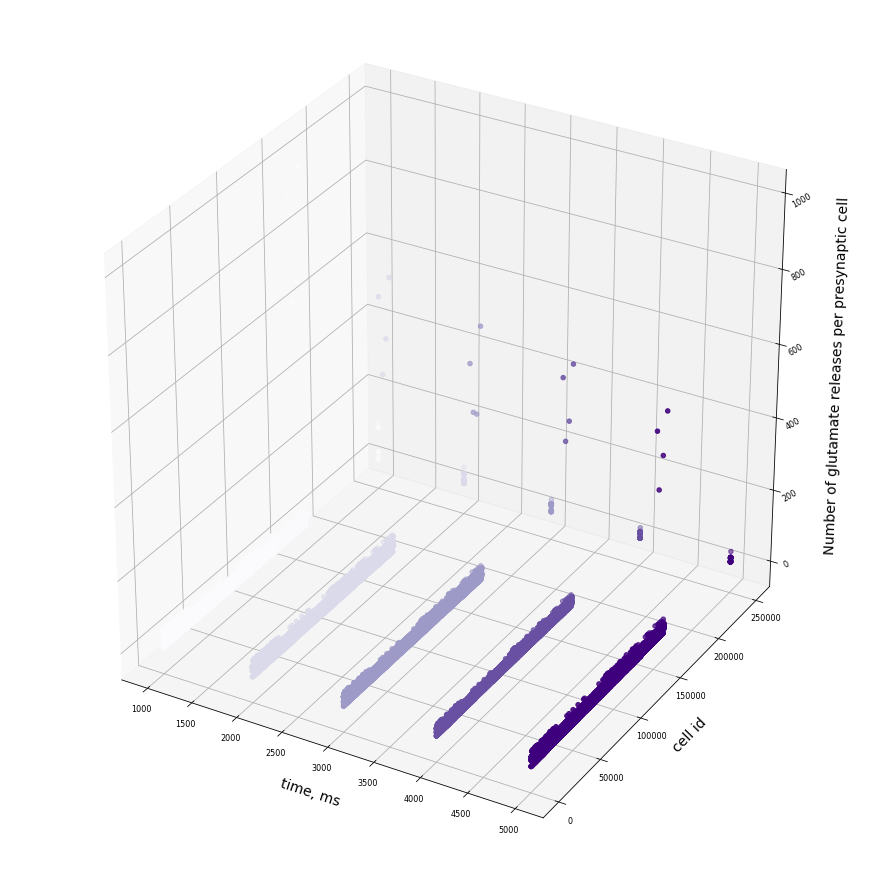

In [44]:
from mpl_toolkits.mplot3d import Axes3D  

fig = plt.figure(figsize=(12,12))
ax = Axes3D(fig)

xs = outs_r_gaba_noMet['time, ms']
ys = outs_r_gaba_noMet[1]
zs = outs_r_gaba_noMet[2]

ax.scatter(xs, ys, zs, marker='o',c=xs, cmap=plt.cm.Purples)


ax.set_xlabel('time, ms',labelpad=10,fontsize=14)
ax.set_ylabel('cell id',labelpad=10,fontsize=14)
ax.set_zlabel('Number of glutamate releases per presynaptic cell',labelpad=21,fontsize=14)

ax.tick_params(axis="x", labelsize=8)
ax.tick_params(axis="y", labelsize=8)
ax.tick_params(axis="z", labelsize=8, labelrotation=30)

plt.show()

#fig.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/plot_full_detailed_sim_p150_v1_calcium_mc2_nometab_outs_r_glutamatereleases_3d.pdf')
#fig.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/plot_full_detailed_sim_p150_v1_calcium_mc2_nometab_outs_r_glutamatereleases_3d.png')


In [ ]:
#old

### L1

In [5]:
sim = Simulation('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/simulation/full_detailed_sim_p150_v1/test_cells_mc2_L1/BlueConfig')
report = sim.report('soma')
data = report.get()
data.to_csv('/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/invivolike/full_detailed_sim_p150_L1_02june2020/out_vmv.txt')

Have keys ({'FlushBufferScalar'}) that are not defined for section: Run
Ignoring unknown key: 'FlushBufferScalar'


In [8]:
vmv = pd.read_csv('/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/invivolike/full_detailed_sim_p150_L1_02june2020/out_vmv.txt')
vmv.head()

time          2         3          6         11         21         31  \
0   0.0 -65.000000 -65.00000 -65.000000 -65.000000 -65.000000 -65.000000   
1   0.1 -65.157120 -65.18924 -65.083435 -65.206215 -65.168420 -65.136215   
2   0.2 -65.204994 -65.24127 -65.116710 -65.280396 -65.213370 -65.160164   
3   0.3 -65.204090 -65.23641 -65.128260 -65.295620 -65.220665 -65.129490   
4   0.4 -65.166360 -65.19135 -65.122444 -65.263060 -65.203190 -65.056520   

          39        48         49  ...      28366      28371      28376  \
0 -65.000000 -65.00000 -65.000000  ... -65.000000 -65.000000 -65.000000   
1 -65.125670 -65.15842 -65.137930  ... -65.081460 -65.117516 -65.101364   
2 -65.164200 -65.19833 -65.161380  ... -65.107445 -65.167100 -65.127350   
3 -65.165855 -65.19505 -65.129020  ... -65.101340 -65.192620 -65.112490   
4 -65.142944 -65.16003 -65.053314  ... -65.066130 -65.200790 -65.063080   

       28379     28383      28384      28386     28407     28412      28421  
0 -65.000000 -65.00000 -65.000000 -65.000000 -65.00000 -65.00000 -65.000000  
1 -65.110535 -65.23725 -65.292534 -65.225330 -65.19260 -65.10667 -65.204330  
2 -65.138260 -65.32961 -65.420715 -65.321556 -65.29357 -65.14976 -65.305504  
3 -65.128100 -65.36445 -65.464920 -65.373190 -65.35757 -65.16294 -65.359120  
4 -65.086655 -65.35344 -65.445800 -65.392530 -65.39393 -65.15433 -65.375626  

[5 rows x 215 columns]

In [13]:
len(vmv.columns)

215

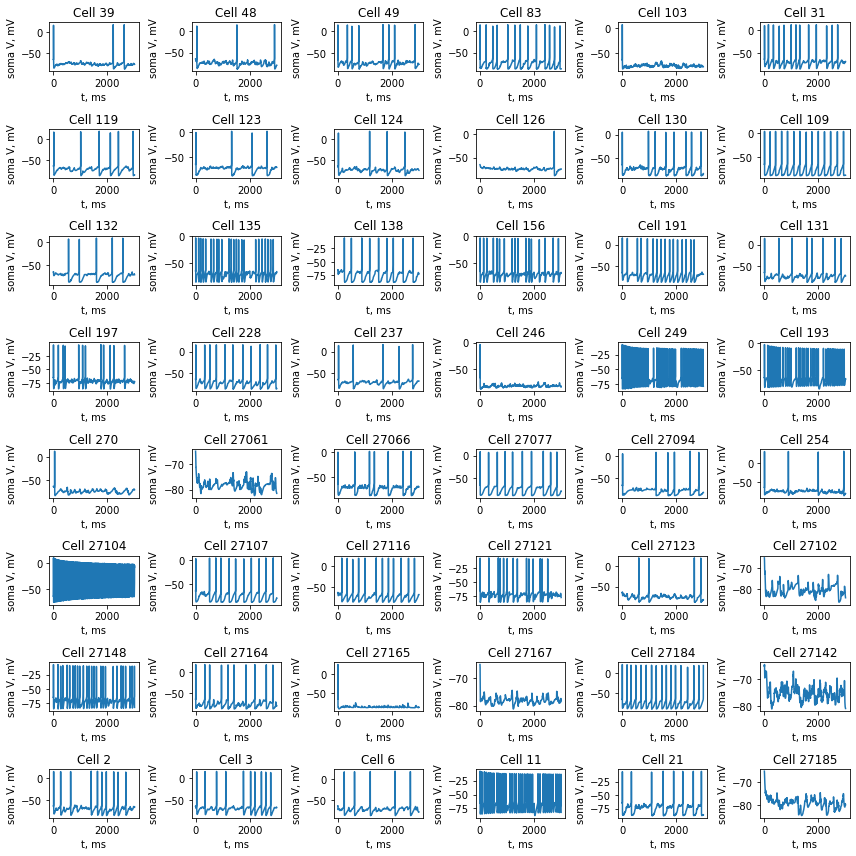

In [18]:
fig, axs = plt.subplots(8,6,figsize=(12,12))

for i,c in enumerate(vmv.columns[0:49]):
    if i == 0:
        continue
    x = i % 6 -1
    y = i // 6 -1
    axs[y, x].plot(vmv['time'],vmv[c])
    axs[y, x].set_title(f'Cell {c}')

for ax in axs.flat:
    ax.set(xlabel='t, ms', ylabel='soma V, mV')

fig.tight_layout()

#plt.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/simulation/full_detailed_sim_p150_v1/test_cells_mc2_L1/plot_vmv_L1.pdf')


### mc2 nometab

In [5]:
#sim = Simulation('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/simulation/full_detailed_sim_p150_v1/calcium/BlueConfig')

report = sim.report('soma')
data = report.get()

#data.to_csv('/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/invivolike/full_detailed_sim_p150_nometab_14june2020/out_vmv.txt')


Have keys ({'FlushBufferScalar'}) that are not defined for section: Run
Ignoring unknown key: 'FlushBufferScalar'


In [6]:
vmv = pd.read_csv('/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/invivolike/full_detailed_sim_p150_nometab_14june2020/out_vmv.txt')
vmv.head()


time          2         3          6         11         21         31  \
0   0.0 -65.000000 -65.00000 -65.000000 -65.000000 -65.000000 -65.000000   
1   0.1 -65.157120 -65.18924 -65.083435 -65.206215 -65.168420 -65.136215   
2   0.2 -65.204994 -65.24127 -65.116710 -65.280396 -65.213370 -65.160164   
3   0.3 -65.204090 -65.23641 -65.128260 -65.295620 -65.220665 -65.129490   
4   0.4 -65.166360 -65.19135 -65.122444 -65.263060 -65.203190 -65.056520   

          39        48         49  ...     163211    163221     163231  \
0 -65.000000 -65.00000 -65.000000  ... -65.000000 -65.00000 -65.000000   
1 -65.125670 -65.15842 -65.137930  ... -65.207016 -65.44655 -65.392580   
2 -65.164200 -65.19833 -65.161380  ... -65.272770 -65.32105 -65.523990   
3 -65.165855 -65.19505 -65.129020  ... -65.283160 -64.92055 -65.554726   
4 -65.142944 -65.16003 -65.053314  ... -65.257920 -64.32400 -65.522220   

     163241     163250    163254    163255     163257    163260     163263  
0 -65.00000 -65.000000 -65.00000 -65.00000 -65.000000 -65.00000 -65.000000  
1 -65.30580 -65.217430 -65.39965 -65.13826 -65.172615 -65.11491 -65.128235  
2 -65.44089 -65.286970 -65.53355 -65.09049 -65.250880 -65.15506 -65.180725  
3 -65.49640 -65.297775 -65.56550 -64.95186 -65.281610 -65.15517 -65.194490  
4 -65.49726 -65.270966 -65.53265 -64.74878 -65.278600 -65.12590 -65.180530  

[5 rows x 22919 columns]

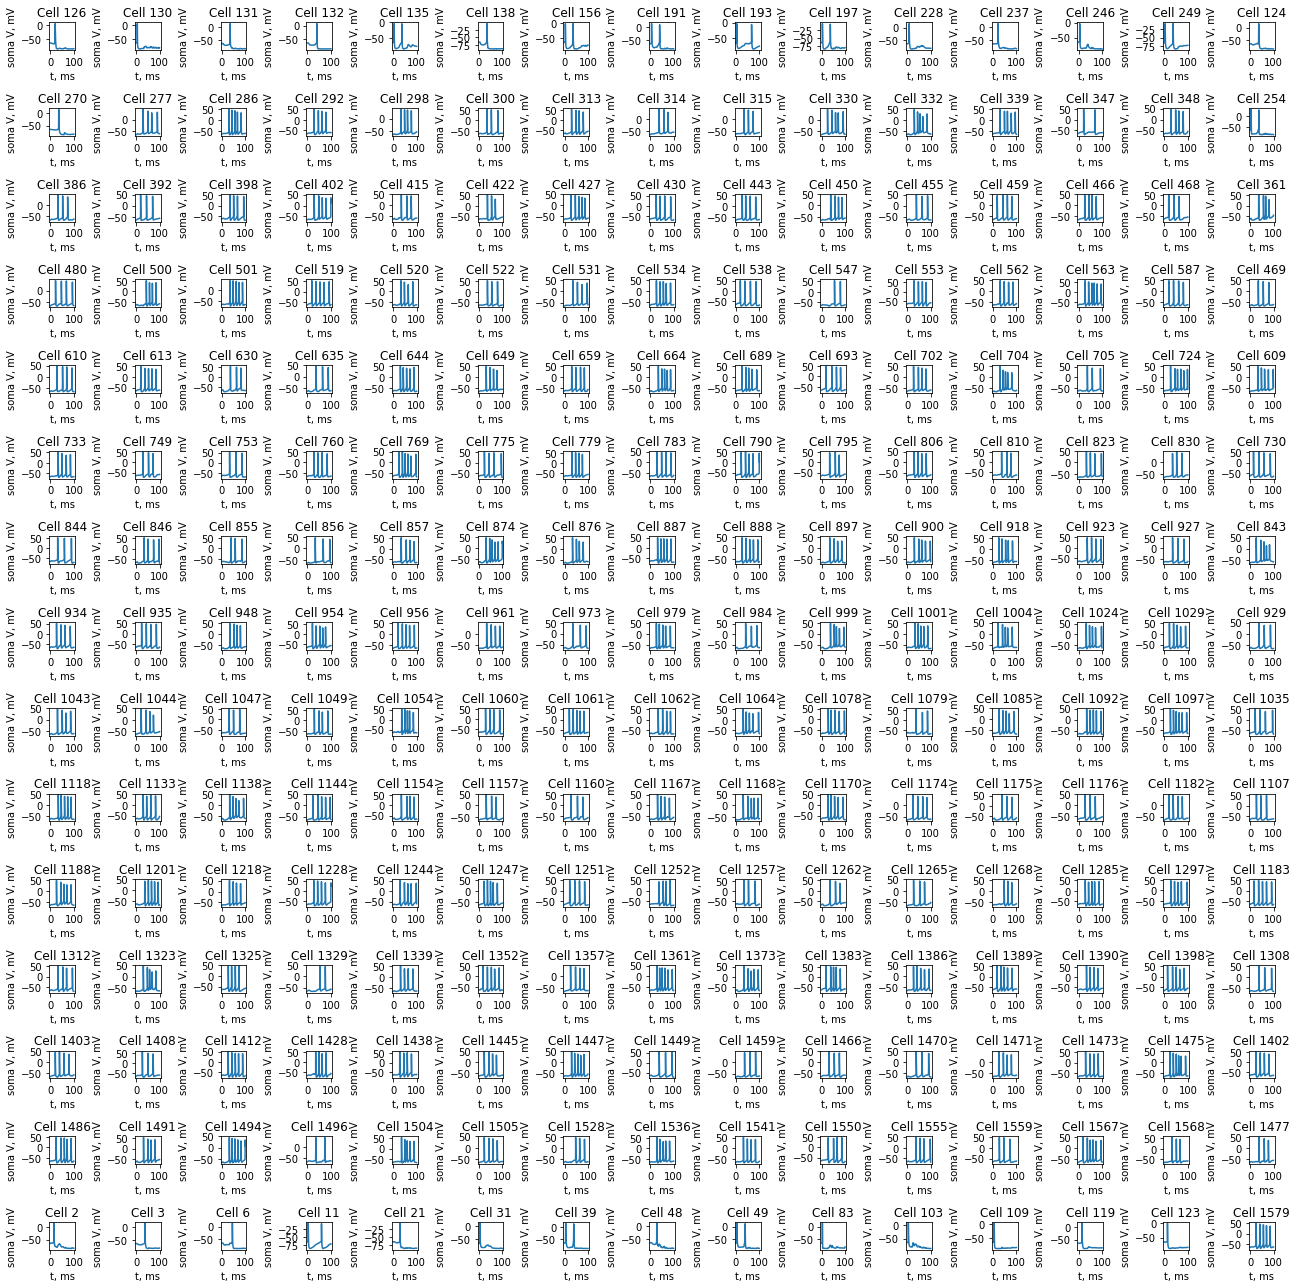

In [15]:
fig, axs = plt.subplots(15,15,figsize=(18,18))

for i,c in enumerate(vmv.columns[0:226]):
    if i == 0:
        continue
    x = i % 15 -1
    y = i // 15 -1
    axs[y, x].plot(vmv['time'],vmv[c])
    axs[y, x].set_title(f'Cell {c}')

for ax in axs.flat:
    ax.set(xlabel='t, ms', ylabel='soma V, mV')

fig.tight_layout()

#plt.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/simulation/full_detailed_sim_p150_v1/calcium/plot_vmv_mc2_nometab_64.pdf')

#plt.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/simulation/full_detailed_sim_p150_v1/calcium/plot_vmv_mc2_nometab_100.pdf')
#plt.savefig('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/simulation/full_detailed_sim_p150_v1/calcium/plot_vmv_mc2_nometab_225.pdf')


### met mc2 5kms

In [10]:
!squeue -u shichkov

JOBID     USER     ACCOUNT           NAME       PARTITION ST     REASON     START_TIME       END_TIME      TIME_LEFT NODES               NODELIST(REASON)
858094    shichkov proj34              sh            prod  R       None       06:58:54       18:58:54        4:53:34     2                     r1i7n[1,8]
858082    shichkov proj34              sh            prod  R       None       06:33:17       18:33:17        4:27:57    12                    r1i4n[0-11]
858388    shichkov proj34              sh            prod  R       None       13:34:26       17:34:26        3:29:06    12 r1i5n[3-4,28],r1i6n[6-8,25-27],r1i7n21,r2i1n[24-25]


In [11]:
!ls /gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/simulation/full_detailed_sim_p150_v1/ca_met

BlueConfig				 nrn_jl_syn_met_16june_atprate_v2.py
julia_code_atpmod_CaGly.jl		 nrn_jl_syn_met_16june.py
julia_code_atpmod.jl			 pydamus_2020-06-16_12h41.log
julia_code.jl				 pydamus_2020-06-16_12h53.log
ngv-stderr858308.log			 pydamus_2020-06-16_13h11.log
nrn_jl_syn_12june_nometab_calcium_cp.py  pydamus_2020-06-16_13h53.log
nrn_jl_syn_12june_nometab_calcium.py	 run_syn_newenv_2.sh
nrn_jl_syn_14june_atpmod.py		 run_syn_newenv_3.sh
nrn_jl_syn_9june_atpmod.py		 slurm-858308.out
nrn_jl_syn_9june_v1.py			 user.target


In [13]:
!mkdir /gpfs/bbp.cscs.ch/project/proj34/scratch/polina/invivolike/full_detailed_sim_p150_metab_16june2020

In [14]:
#modif now, use BlueConfig_bkp
sim = Simulation('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/simulation/full_detailed_sim_p150_v1/ca_met/BlueConfig')

report = sim.report('soma')
data = report.get()

data.to_csv('/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/invivolike/full_detailed_sim_p150_metab_16june2020/out_vmv.txt')


Have keys ({'FlushBufferScalar'}) that are not defined for section: Run
Ignoring unknown key: 'FlushBufferScalar'


In [15]:
vmv = pd.read_csv('/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/invivolike/full_detailed_sim_p150_metab_16june2020/out_vmv.txt')
vmv.head()


time          2
0   0.0 -65.000000
1   0.1 -65.157120
2   0.2 -65.204994
3   0.3 -65.204090
4   0.4 -65.166360

In [18]:
vmv.columns

Index(['time', '2'], dtype='object')

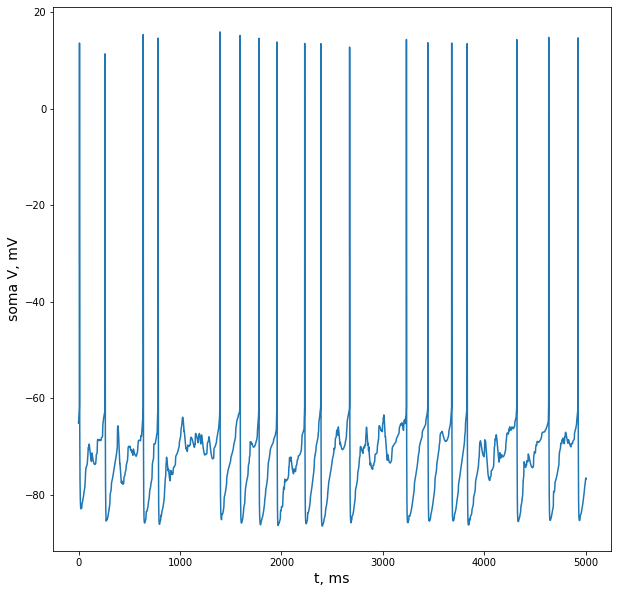

In [24]:
fig = plt.figure(figsize=(10,10))

plt.plot(vmv['time'],vmv['2'])
plt.xlabel('t, ms',fontsize=14)
plt.ylabel('soma V, mV',fontsize=14)

#plt.savefig('/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/invivolike/full_detailed_sim_p150_metab_16june2020/plot_vmv_mc2_metab_a2.pdf')


In [25]:
#modif now, use BlueConfig_bkp
sim = Simulation('/gpfs/bbp.cscs.ch/home/shichkov/dan/nrnsteps/invivolike/simulation/full_detailed_sim_p150_v1/ca_met/BlueConfig')

report = sim.report('soma')
data = report.get()

data.to_csv('/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/invivolike/full_detailed_sim_p150_metab_16june2020/out_vmv_pyr.txt')


Have keys ({'FlushBufferScalar'}) that are not defined for section: Run
Ignoring unknown key: 'FlushBufferScalar'


In [26]:
vmv = pd.read_csv('/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/invivolike/full_detailed_sim_p150_metab_16june2020/out_vmv_pyr.txt')
vmv.head()


time     127631
0   0.0 -65.000000
1   0.1 -65.083855
2   0.2 -65.061226
3   0.3 -64.974650
4   0.4 -64.837000

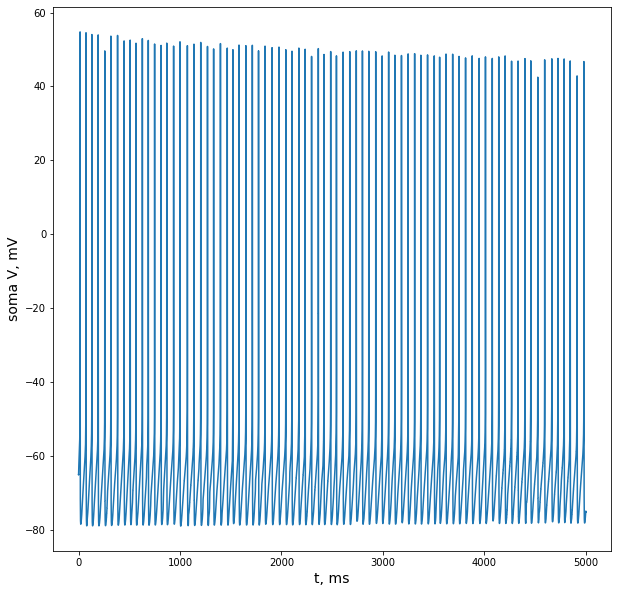

In [29]:
fig = plt.figure(figsize=(10,10))

plt.plot(vmv['time'],vmv['127631'])
plt.xlabel('t, ms',fontsize=14)
plt.ylabel('soma V, mV',fontsize=14)

#plt.savefig('/gpfs/bbp.cscs.ch/project/proj34/scratch/polina/invivolike/full_detailed_sim_p150_metab_16june2020/plot_vmv_mc2_metab_a127631.pdf')
